# Importing Library and Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error
ems=pd.read_csv('co2_emissions (1).csv')
ems.head(15)

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
0,ACURA,ILX,COMPACT,2.0,4,AS,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
5,ACURA,RLX,MID-SIZE,3.5,6,AS,Z,11.9,7.7,10.0,28,230
6,ACURA,TL,MID-SIZE,3.5,6,AS,Z,11.8,8.1,10.1,28,232
7,ACURA,TL AWD,MID-SIZE,3.7,6,AS,Z,12.8,9.0,11.1,25,255
8,ACURA,TL AWD,MID-SIZE,3.7,6,M,Z,13.4,9.5,11.6,24,267
9,ACURA,TSX,COMPACT,2.4,4,AS,Z,10.6,7.5,9.2,31,212


# EDA

In [2]:
ems.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   make                            7385 non-null   object 
 1   model                           7385 non-null   object 
 2   vehicle_class                   7385 non-null   object 
 3   engine_size                     7385 non-null   float64
 4   cylinders                       7385 non-null   int64  
 5   transmission                    7385 non-null   object 
 6   fuel_type                       7385 non-null   object 
 7   fuel_consumption_city           7385 non-null   float64
 8   fuel_consumption_hwy            7385 non-null   float64
 9   fuel_consumption_comb(l/100km)  7385 non-null   float64
 10  fuel_consumption_comb(mpg)      7385 non-null   int64  
 11  co2_emissions                   7385 non-null   int64  
dtypes: float64(4), int64(3), object(5)

In [3]:
ems.isnull().sum()

make                              0
model                             0
vehicle_class                     0
engine_size                       0
cylinders                         0
transmission                      0
fuel_type                         0
fuel_consumption_city             0
fuel_consumption_hwy              0
fuel_consumption_comb(l/100km)    0
fuel_consumption_comb(mpg)        0
co2_emissions                     0
dtype: int64

In [4]:
ems[ems.duplicated()]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
1075,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS,Z,12.1,8.7,10.6,27,244
1076,ACURA,RLX,MID-SIZE,3.5,6,AS,Z,11.9,7.7,10.0,28,230
1081,ALFA ROMEO,4C,TWO-SEATER,1.8,4,AM,Z,9.7,6.9,8.4,34,193
1082,ASTON MARTIN,DB9,MINICOMPACT,5.9,12,A,Z,18.0,12.6,15.6,18,359
1084,ASTON MARTIN,V8 VANTAGE,TWO-SEATER,4.7,8,AM,Z,17.4,11.3,14.7,19,338
...,...,...,...,...,...,...,...,...,...,...,...,...
7356,TOYOTA,Tundra,PICKUP TRUCK - STANDARD,5.7,8,AS,X,17.7,13.6,15.9,18,371
7365,VOLKSWAGEN,Golf GTI,COMPACT,2.0,4,M,X,9.8,7.3,8.7,32,203
7366,VOLKSWAGEN,Jetta,COMPACT,1.4,4,AS,X,7.8,5.9,7.0,40,162
7367,VOLKSWAGEN,Jetta,COMPACT,1.4,4,M,X,7.9,5.9,7.0,40,163


In [5]:
ems.drop_duplicates(inplace=True)

In [6]:
ems.nunique()

make                                42
model                             2053
vehicle_class                       16
engine_size                         51
cylinders                            8
transmission                         5
fuel_type                            5
fuel_consumption_city              211
fuel_consumption_hwy               143
fuel_consumption_comb(l/100km)     181
fuel_consumption_comb(mpg)          54
co2_emissions                      331
dtype: int64

In [7]:
print(ems.vehicle_class.value_counts())

SUV - SMALL                 1004
MID-SIZE                     981
COMPACT                      902
SUV - STANDARD               613
SUBCOMPACT                   532
FULL-SIZE                    508
PICKUP TRUCK - STANDARD      474
TWO-SEATER                   381
MINICOMPACT                  274
STATION WAGON - SMALL        212
PICKUP TRUCK - SMALL         133
VAN - PASSENGER               66
SPECIAL PURPOSE VEHICLE       65
MINIVAN                       61
STATION WAGON - MID-SIZE      45
VAN - CARGO                   22
Name: vehicle_class, dtype: int64


In [8]:
ems.cylinders.value_counts()

4     2741
6     2040
8     1201
12     135
3       88
10      40
5       26
16       2
Name: cylinders, dtype: int64

In [9]:
ems.transmission.value_counts()

AS    2720
A     1536
M     1019
AM     540
AV     458
Name: transmission, dtype: int64

In [10]:
ems.fuel_type.value_counts()

X    3030
Z    2765
E     330
D     147
N       1
Name: fuel_type, dtype: int64

In [11]:
ems[ems['fuel_type']=='N']

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
2439,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,AS,N,15.2,9.5,12.7,22,213


In [12]:
def unique(list1):
    unique_list = pd.Series(list1).drop_duplicates().tolist()
    for x in unique_list:
        print(x)
unique_cars=unique(ems['make'])
unique_cars

ACURA
ALFA ROMEO
ASTON MARTIN
AUDI
BENTLEY
BMW
BUICK
CADILLAC
CHEVROLET
CHRYSLER
DODGE
FIAT
FORD
GMC
HONDA
HYUNDAI
INFINITI
JAGUAR
JEEP
KIA
LAMBORGHINI
LAND ROVER
LEXUS
LINCOLN
MASERATI
MAZDA
MERCEDES-BENZ
MINI
MITSUBISHI
NISSAN
PORSCHE
RAM
ROLLS-ROYCE
SCION
SMART
SRT
SUBARU
TOYOTA
VOLKSWAGEN
VOLVO
GENESIS
BUGATTI


### CARS

ACURA

In [13]:
ems_acura=ems[ems['make']=='ACURA']
ems_acura.shape

(51, 12)

In [14]:
ems_acura.nunique()

make                               1
model                             22
vehicle_class                      4
engine_size                        6
cylinders                          2
transmission                       4
fuel_type                          1
fuel_consumption_city             30
fuel_consumption_hwy              22
fuel_consumption_comb(l/100km)    28
fuel_consumption_comb(mpg)        15
co2_emissions                     38
dtype: int64

In [15]:
print(ems_acura['engine_size'].mean())
print(ems_acura['cylinders'].mean())
print(ems_acura['fuel_consumption_city'].mean())
print(ems_acura['fuel_consumption_hwy'].mean())
print(ems_acura['fuel_consumption_comb(l/100km)'].mean())
print(ems_acura['fuel_consumption_comb(mpg)'].mean())
print(ems_acura['co2_emissions'].mean())

3.003921568627451
5.254901960784314
10.754901960784311
8.037254901960784
9.535294117647059
30.15686274509804
221.66666666666666


<BarContainer object of 51 artists>

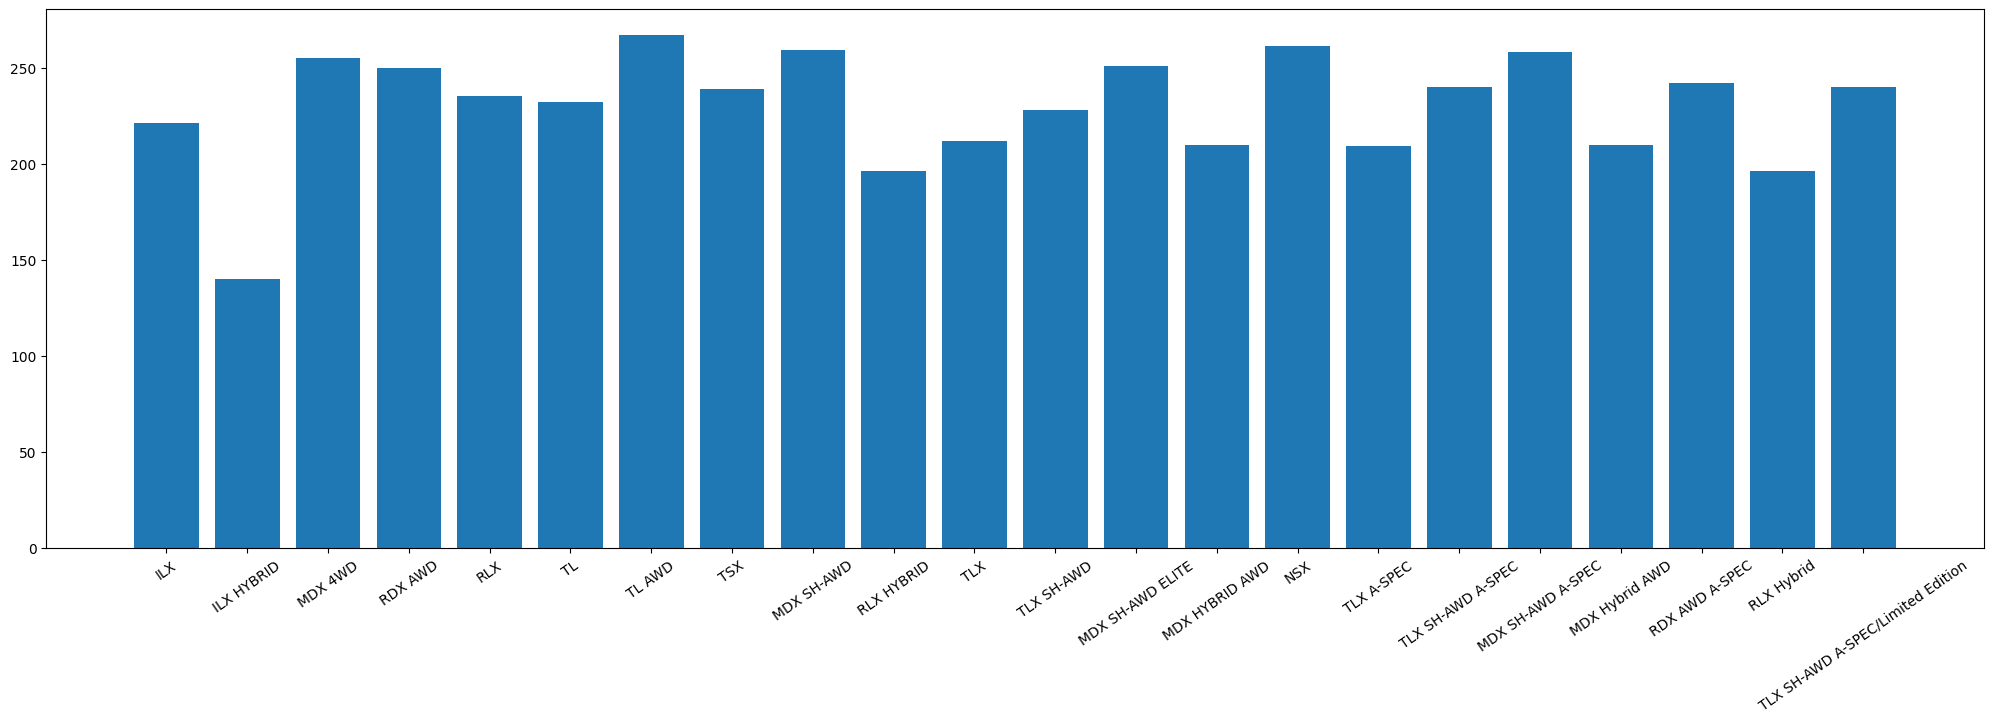

In [16]:
plt.subplots(figsize=(25,7))
plt.xticks(rotation=35)
plt.bar(ems_acura['model'],ems_acura['co2_emissions'])

<BarContainer object of 51 artists>

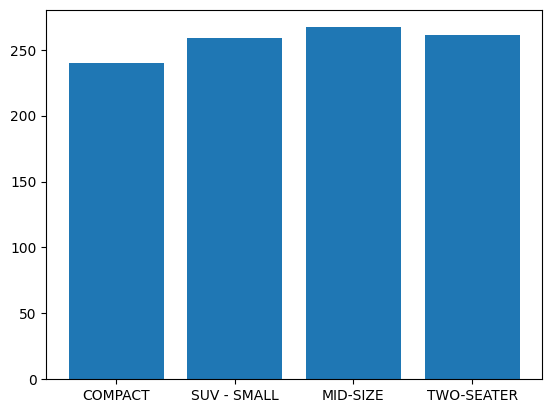

In [17]:
plt.bar(ems_acura['vehicle_class'],ems_acura['co2_emissions'])

[2.  2.4 1.5 3.5 3.7 3. ]


<BarContainer object of 51 artists>

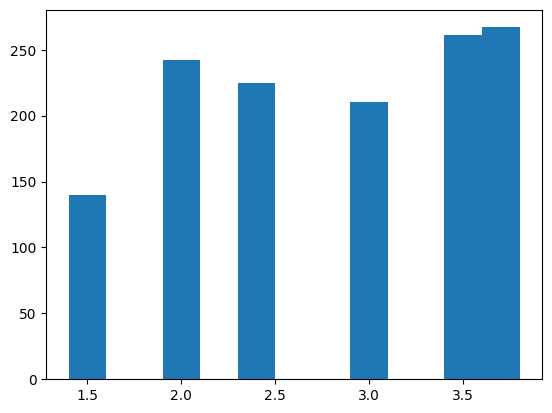

In [18]:
print(ems_acura['engine_size'].unique())
plt.bar(ems_acura['engine_size'],ems_acura['co2_emissions'],width=0.2)

[4 6]


<BarContainer object of 51 artists>

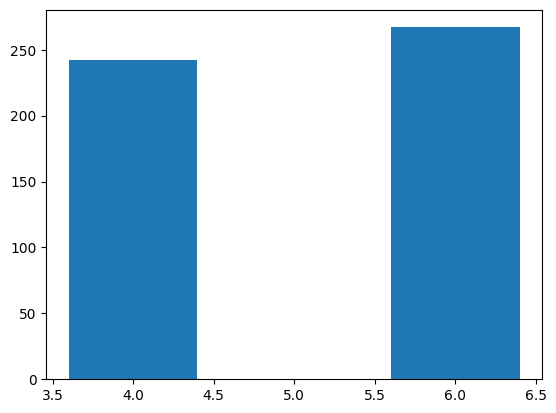

In [19]:
print(ems_acura['cylinders'].unique())
plt.bar(ems_acura['cylinders'],ems_acura['co2_emissions'])

['AS' 'M' 'AV' 'AM']


<BarContainer object of 51 artists>

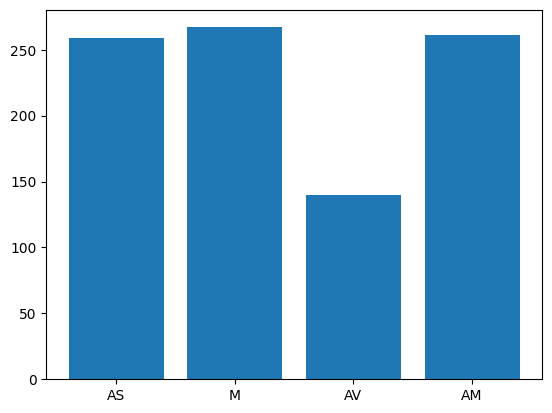

In [20]:
print(ems_acura['transmission'].unique())
plt.bar(ems_acura['transmission'],ems_acura['co2_emissions'])

['Z']


<BarContainer object of 51 artists>

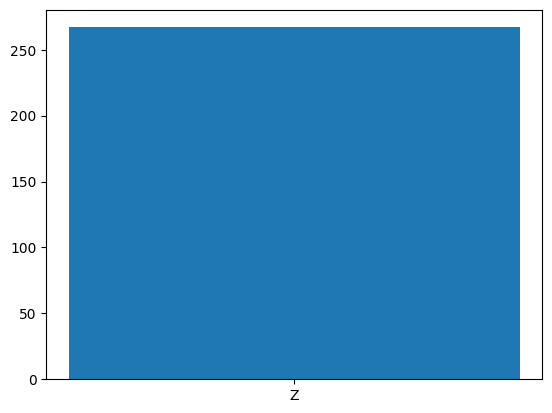

In [21]:
print(ems_acura['fuel_type'].unique())
plt.bar(ems_acura['fuel_type'],ems_acura['co2_emissions'])

ALFA ROMEO

In [22]:
ems_alfaromeo=ems[ems['make']=='ALFA ROMEO']
ems_alfaromeo.shape

(19, 12)

ASTON MARTIN

In [23]:
ems_astonmartin=ems[ems['make']=='ASTON MARTIN']
ems_astonmartin.shape

(39, 12)

AUDI

In [24]:
ems_audi=ems[ems['make']=='AUDI']
ems_audi.shape

(263, 12)

BENTLY

In [25]:
ems_bentley=ems[ems['make']=='BENTLEY']
ems_bentley.shape

(35, 12)

BMW

In [26]:
ems_bmw=ems[ems['make']=='BMW']
ems_bmw.shape

(501, 12)

BUICK

In [27]:
ems_buick=ems[ems['make']=='BUICK']
ems_buick.shape

(92, 12)

CADILLAC

In [28]:
ems_cadillac=ems[ems['make']=='CADILLAC']
ems_cadillac.shape

(141, 12)

CHEVROLET

In [29]:
ems_chevrolet=ems[ems['make']=='CHEVROLET']
ems_chevrolet.shape

(515, 12)

CHRYSLER

In [30]:
ems_chrysler=ems[ems['make']=='CHRYSLER']
ems_chrysler.shape

(64, 12)

DODGE

In [31]:
ems_dodge=ems[ems['make']=='DODGE']
ems_dodge.shape

(180, 12)

FIAT

In [32]:
ems_fiat=ems[ems['make']=='FIAT']
ems_fiat.shape

(56, 12)

FORD

In [33]:
ems_ford=ems[ems['make']=='FORD']
ems_ford.shape

(575, 12)

GMC

In [34]:
ems_gmc=ems[ems['make']=='GMC']
ems_gmc.shape

(289, 12)

HONDA

In [35]:
ems_honda=ems[ems['make']=='HONDA']
ems_honda.shape

(159, 12)

HYUNDAI

In [36]:
ems_hyundai=ems[ems['make']=='HYUNDAI']
ems_hyundai.shape

(184, 12)

INFINITI

In [37]:
ems_infiniti=ems[ems['make']=='INFINITI']
ems_infiniti.shape

(87, 12)

JAGUAR

In [38]:
ems_jaguar=ems[ems['make']=='JAGUAR']
ems_jaguar.shape

(118, 12)

JEEP

In [39]:
ems_jeep=ems[ems['make']=='JEEP']
ems_jeep.shape

(200, 12)

KIA

In [40]:
ems_kia=ems[ems['make']=='KIA']
ems_kia.shape

(192, 12)

LAMBORGHINI

In [41]:
ems_lamb=ems[ems['make']=='LAMBORGHINI']
ems_lamb.shape

(37, 12)

LAND ROVER

In [42]:
ems_landrover=ems[ems['make']=='LAND ROVER']
ems_landrover.shape

(76, 12)

LEXUS

In [43]:
ems_lexus=ems[ems['make']=='LEXUS']
ems_lexus.shape

(129, 12)

LINCOLN

In [44]:
ems_lincoln=ems[ems['make']=='LINCOLN']
ems_lincoln.shape

(81, 12)

MASERATI

In [45]:
ems_maserati=ems[ems['make']=='MASERATI']
ems_maserati.shape

(52, 12)

MAZDA

In [46]:
ems_mazda=ems[ems['make']=='MAZDA']
ems_mazda.shape

(127, 12)

MERCEDES-BENZ

In [47]:
ems_benz=ems[ems['make']=='MERCEDES-BENZ']
ems_benz.shape

(365, 12)

MINI

In [48]:
ems_mini=ems[ems['make']=='MINI']
ems_mini.shape

(200, 12)

MITSUBISHI

In [49]:
ems_mitsubishi=ems[ems['make']=='MITSUBISHI']
ems_mitsubishi.shape

(73, 12)

NISSAN

In [50]:
ems_nissan=ems[ems['make']=='NISSAN']
ems_nissan.shape

(213, 12)

PORSCHE

In [51]:
ems_porsche=ems[ems['make']=='PORSCHE']
ems_porsche.shape

(296, 12)

RAM

In [52]:
ems_ram=ems[ems['make']=='RAM']
ems_ram.shape

(72, 12)

ROLLS-ROYCE

In [53]:
ems_rollsroyce=ems[ems['make']=='ROLLS-ROYCE']
ems_rollsroyce.shape

(48, 12)

SCION

In [54]:
ems_scion=ems[ems['make']=='SCION']
ems_scion.shape

(21, 12)

SMART

In [55]:
ems_smart=ems[ems['make']=='SMART']
ems_smart.shape

(7, 12)

SRT

In [56]:
ems_srt=ems[ems['make']=='SRT']
ems_srt.shape

(2, 12)

SUBARU

In [57]:
ems_subaru=ems[ems['make']=='SUBARU']
ems_subaru.shape

(119, 12)

TOYOTA

In [58]:
ems_toyota=ems[ems['make']=='TOYOTA']
ems_toyota.shape

(274, 12)

VOLKSWAGEN

In [59]:
ems_volkswagen=ems[ems['make']=='VOLKSWAGEN']
ems_volkswagen.shape

(187, 12)

VOLVO

In [60]:
ems_volvo=ems[ems['make']=='VOLVO']
ems_volvo.shape

(118, 12)

GENESIS

In [61]:
ems_genesis=ems[ems['make']=='GENESIS']
ems_genesis.shape

(14, 12)

BUGATTI

In [62]:
ems_bugatti=ems[ems['make']=='BUGATTI']
ems_bugatti.shape

(2, 12)

### PLOTS

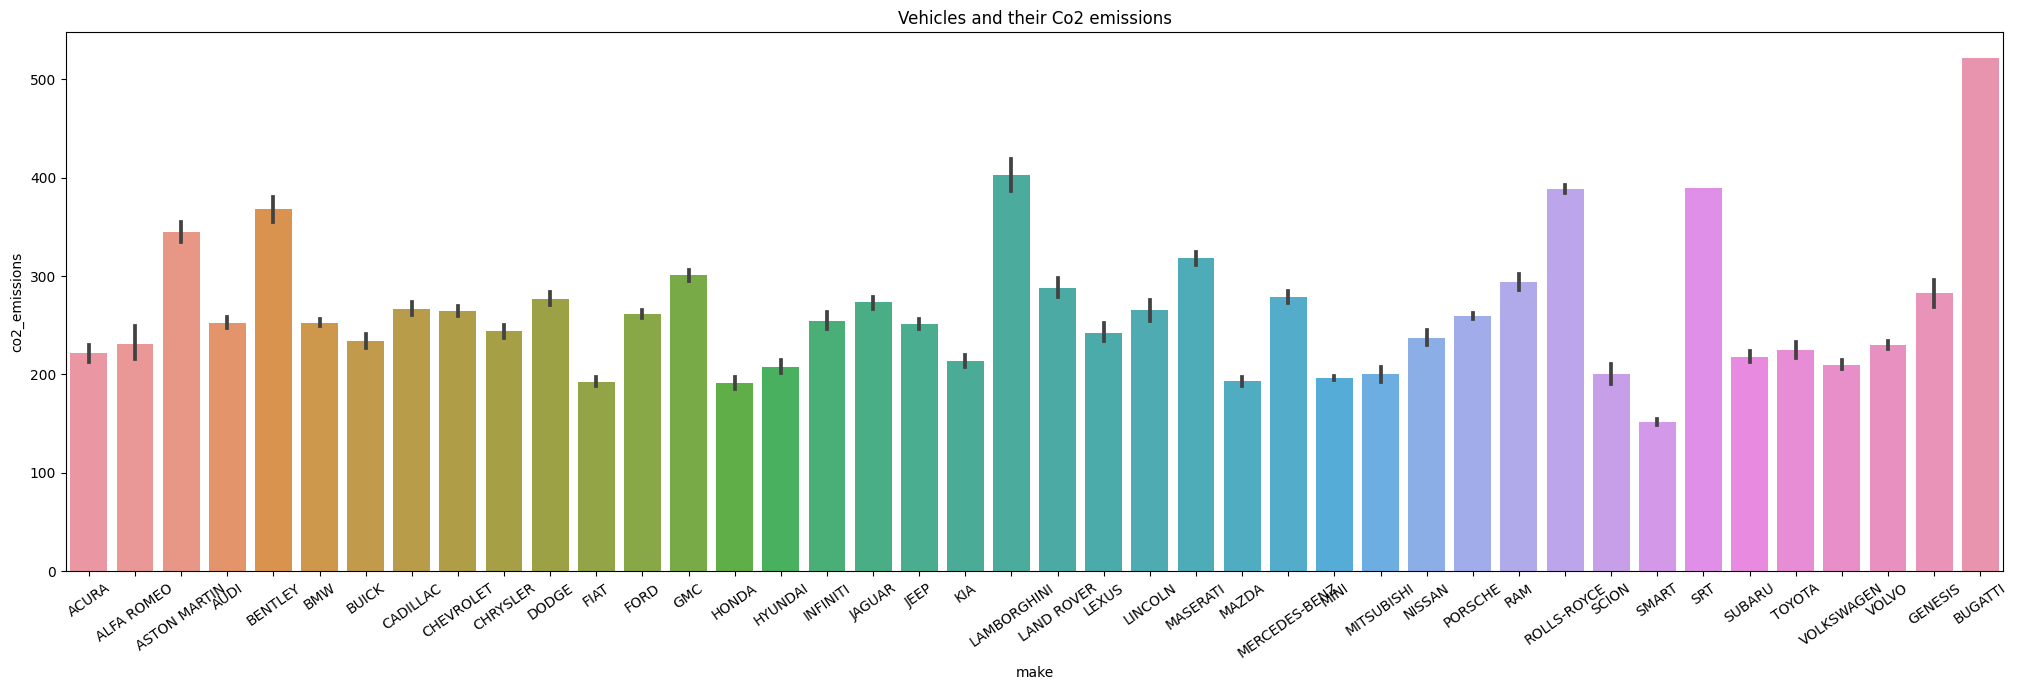

In [63]:
f, ax = plt.subplots(figsize=(25,7))
ax = sns.barplot(data=ems,x='make',y='co2_emissions')
plt.title('Vehicles and their Co2 emissions')
plt.xticks(rotation=35)
plt.show()

BUGATTI has the highest CO2 Emissions

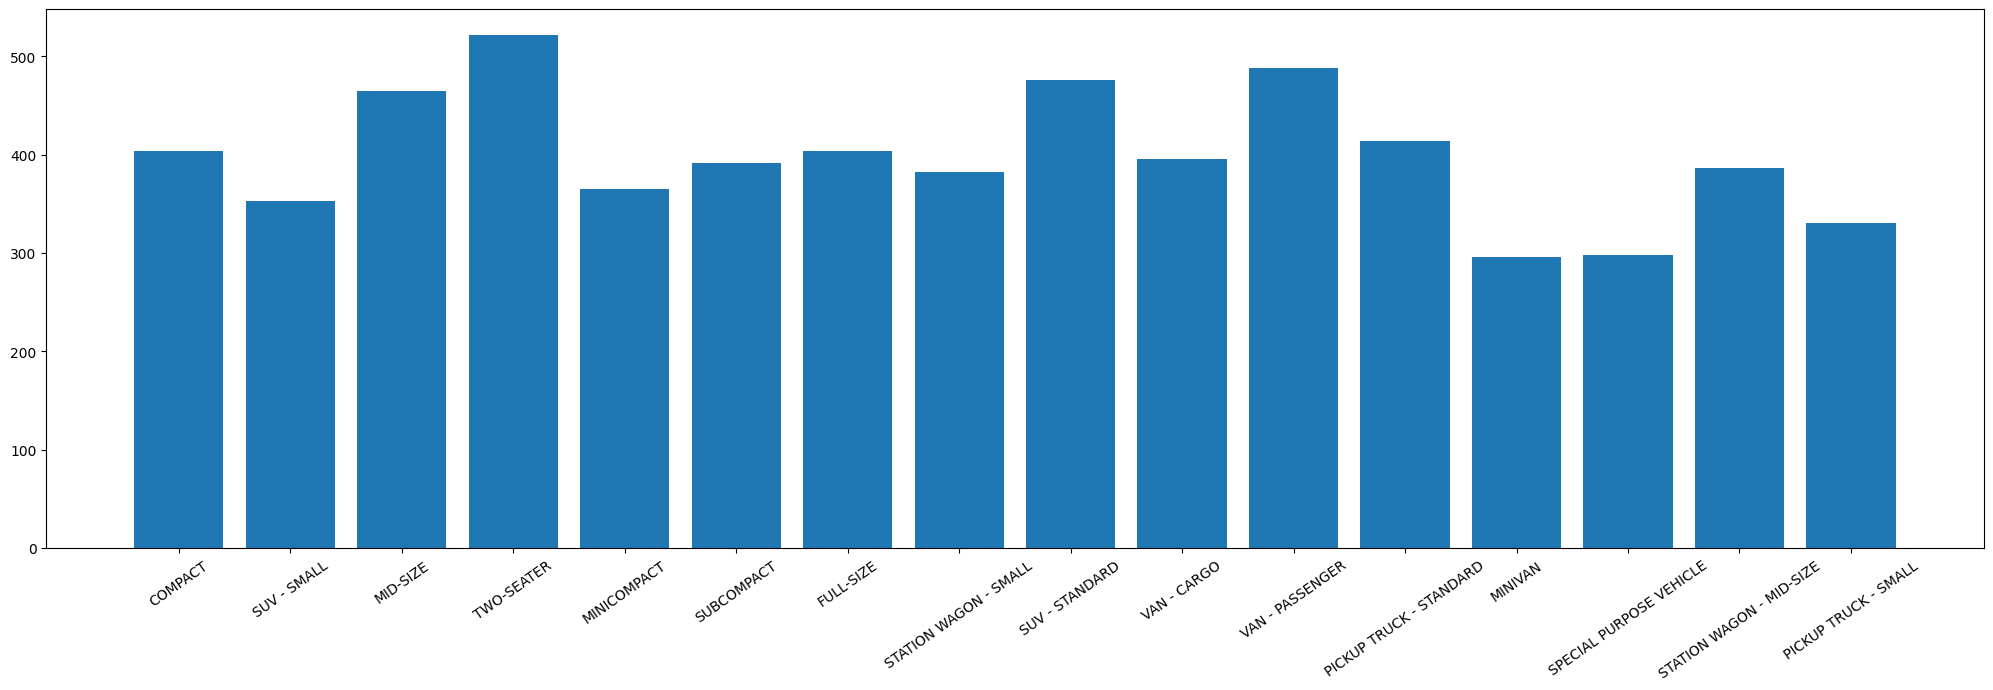

In [64]:
plt.subplots(figsize=(25,7))
plt.bar(ems['vehicle_class'],ems['co2_emissions'])
plt.xticks(rotation=35)
plt.show()

- Two Seater Vehicle class is giving out the most emission which is 520.

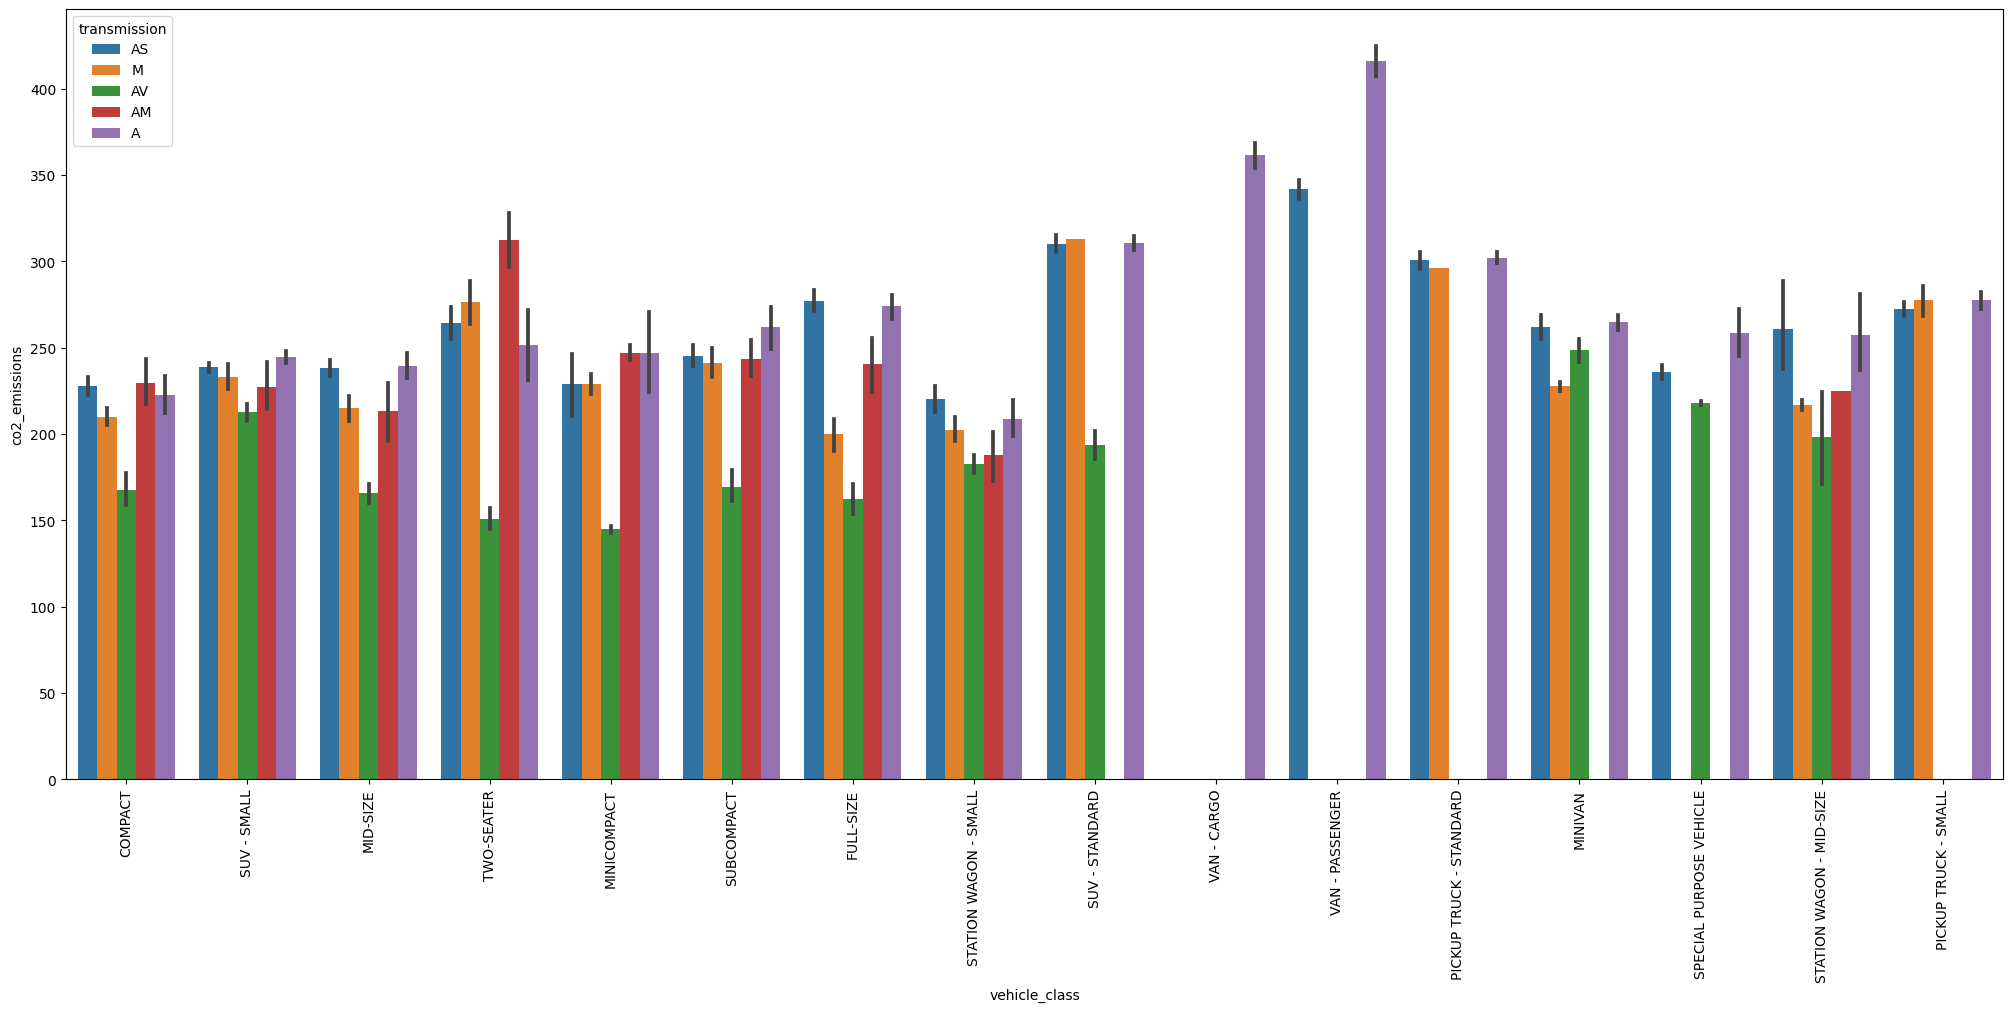

In [65]:
plt.subplots(figsize=(25,10))
sns.barplot(data=ems,x='vehicle_class',y='co2_emissions',hue='transmission')
plt.xticks(rotation=90)
plt.show()

- Automated Manual Transmission is the highest CO2 emission for Two Wheeler Vehicle Class

<Axes: xlabel='cylinders', ylabel='co2_emissions'>

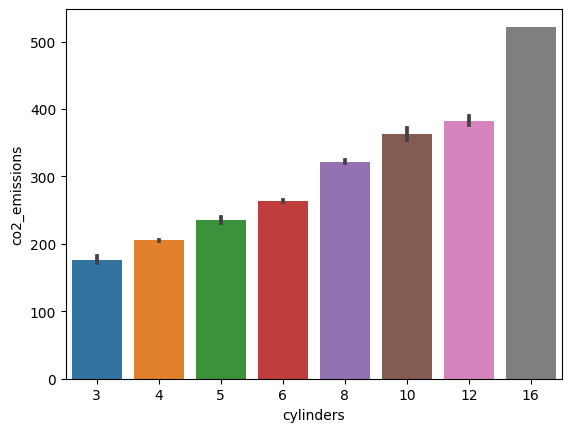

In [66]:
sns.barplot(data=ems,x='cylinders',y='co2_emissions')

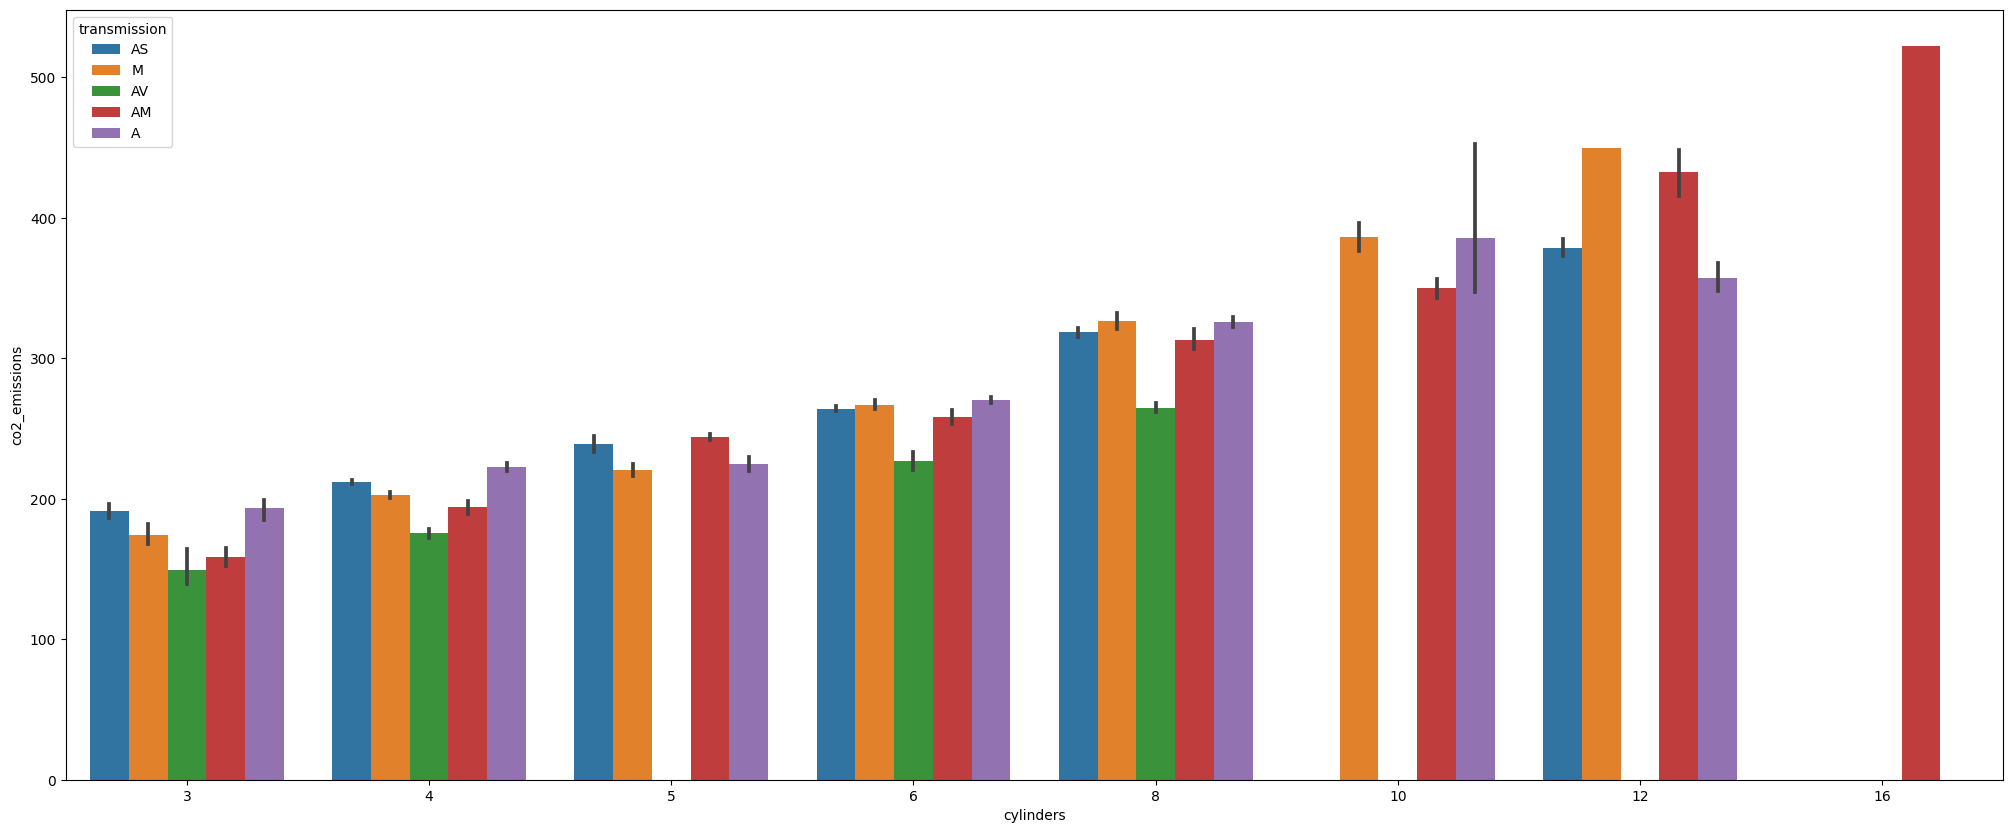

In [67]:
plt.subplots(figsize=(25,10))
sns.barplot(data=ems,x='cylinders',y='co2_emissions',hue='transmission')
plt.show()

- The increase in CO2 emissions in consistantly increasing for every increase in No. of Cylinders.
- The CO2 emissions for Automated Manual Transmission is increasing with increase in no. of Cylinders compared to other Transmissions   

<Axes: xlabel='transmission', ylabel='co2_emissions'>

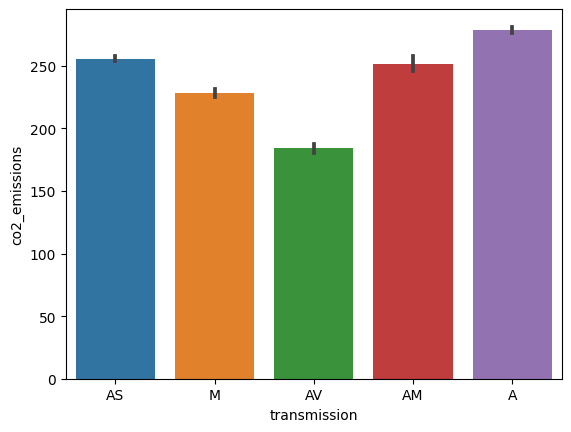

In [68]:
sns.barplot(data=ems,x='transmission',y='co2_emissions')

AS - Autimatic with selected shaft
M  - Manual
AV - Continuously Variable
AM - Automated Manual
A  - Automatic

<Axes: xlabel='transmission', ylabel='co2_emissions'>

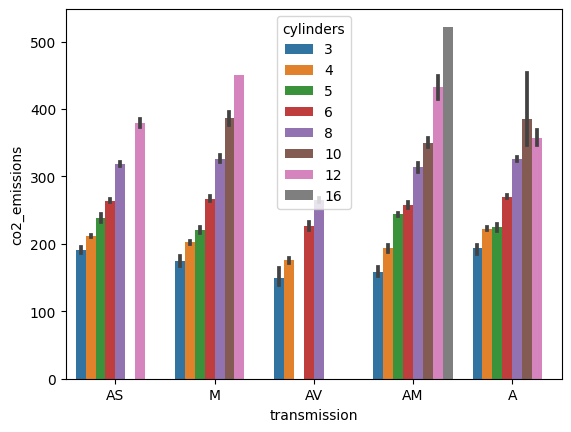

In [69]:
sns.barplot(data=ems,x='transmission',y='co2_emissions',hue='cylinders')

<Axes: xlabel='fuel_type', ylabel='co2_emissions'>

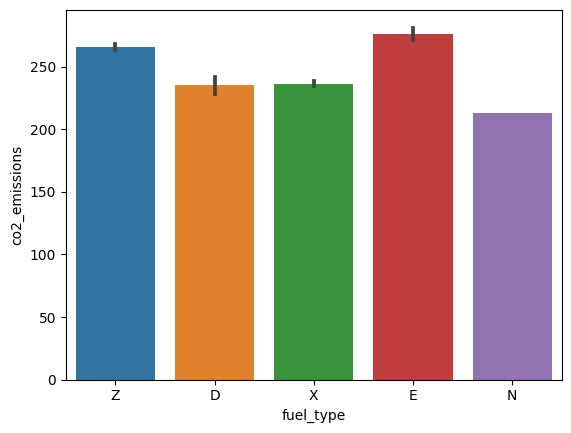

In [70]:
sns.barplot(data=ems,x='fuel_type',y='co2_emissions')

<Axes: xlabel='fuel_type', ylabel='co2_emissions'>

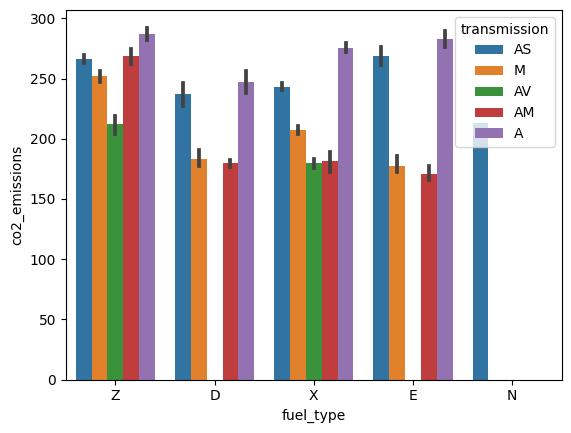

In [71]:
sns.barplot(data=ems,x='fuel_type',y='co2_emissions',hue='transmission')

Z - Premium Gasoline
D - Diesel
X - Regular Gasonine
E - Ethanol
N - Natural Gas

<ipython-input-72-c3ee750386de>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ems.corr(),annot=True)


<Axes: >

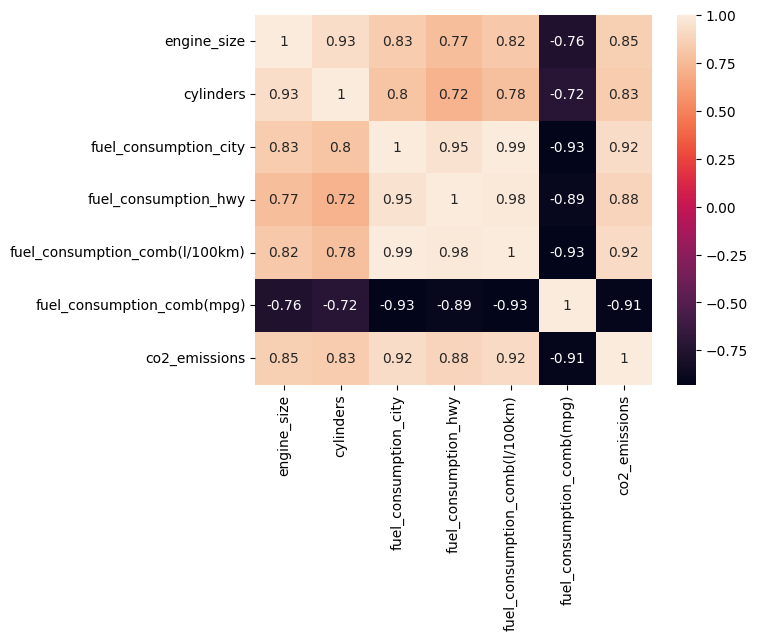

In [72]:
sns.heatmap(ems.corr(),annot=True)

<Axes: xlabel='transmission', ylabel='count'>

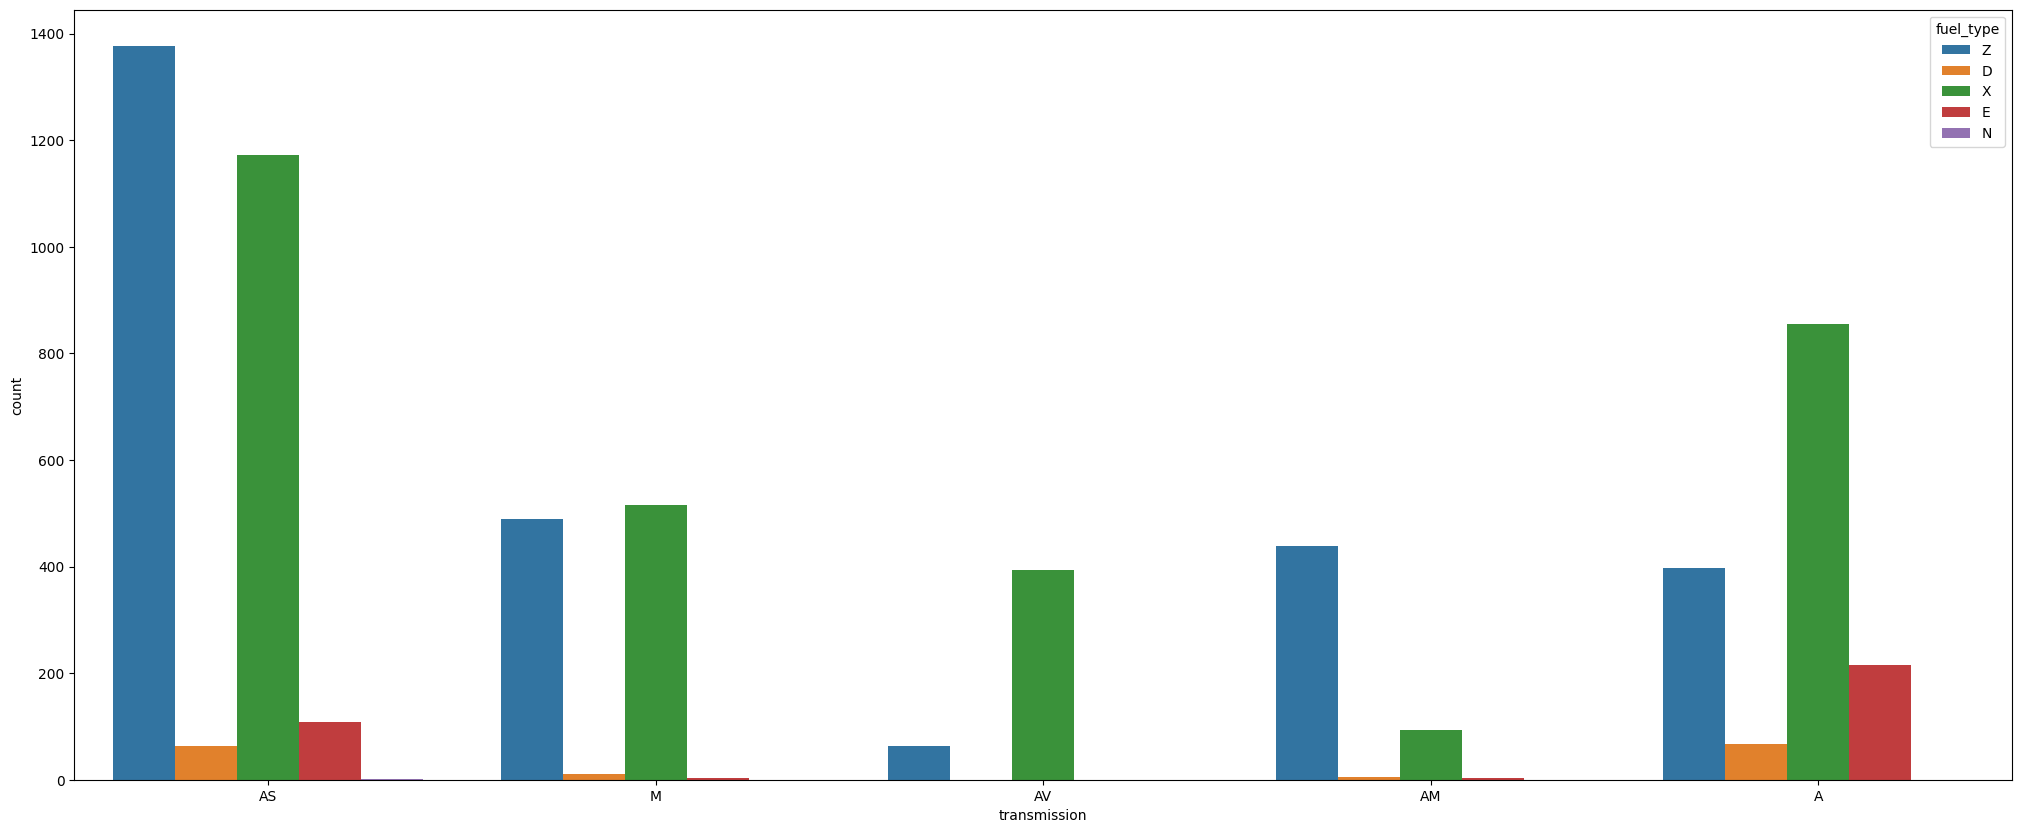

In [73]:
plt.subplots(figsize=(25,10))
sns.countplot(data=ems,x='transmission',hue='fuel_type')

In [74]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
#ems['vehicle_class']=label_encoder.fit_transform(ems['vehicle_class'])
#ems['transmission']=label_encoder.fit_transform(ems['transmission'])
#ems['fuel_type']=label_encoder.fit_transform(ems['fuel_type'])

<ipython-input-75-ce0307ae1c1e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(ems.corr(),annot=True)


<Axes: >

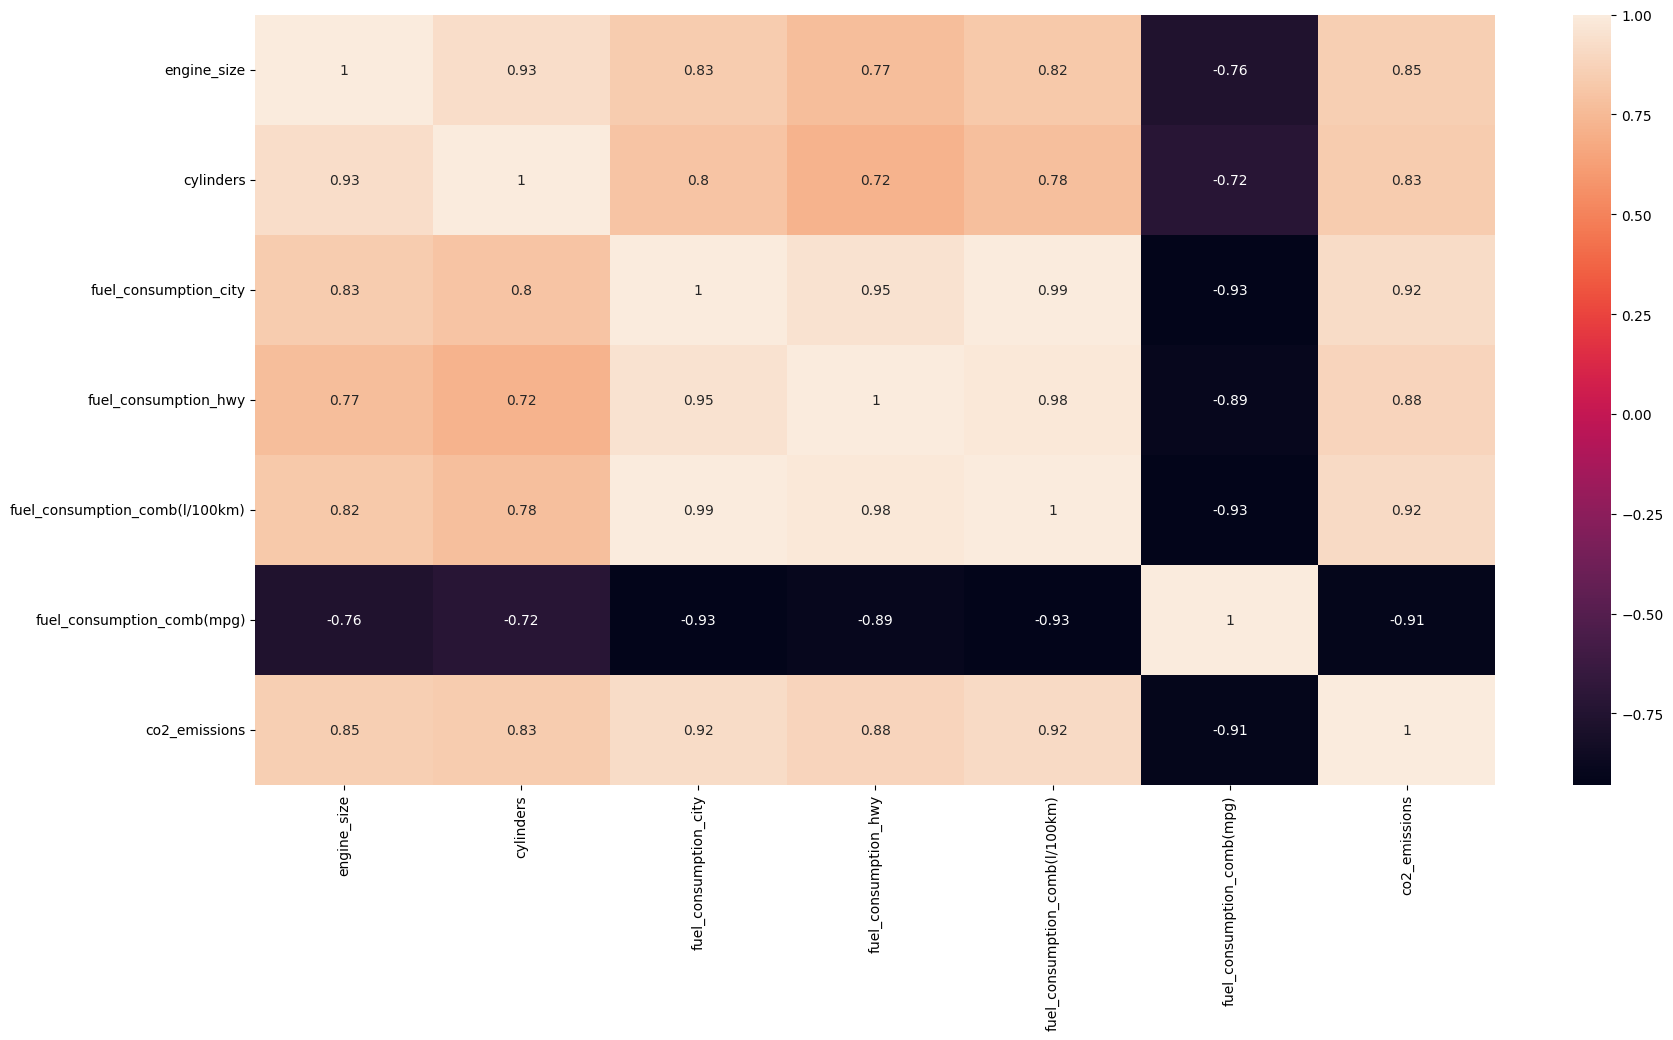

In [75]:
plt.subplots(figsize=(20,10))
sns.heatmap(ems.corr(),annot=True)

<Axes: xlabel='transmission', ylabel='co2_emissions'>

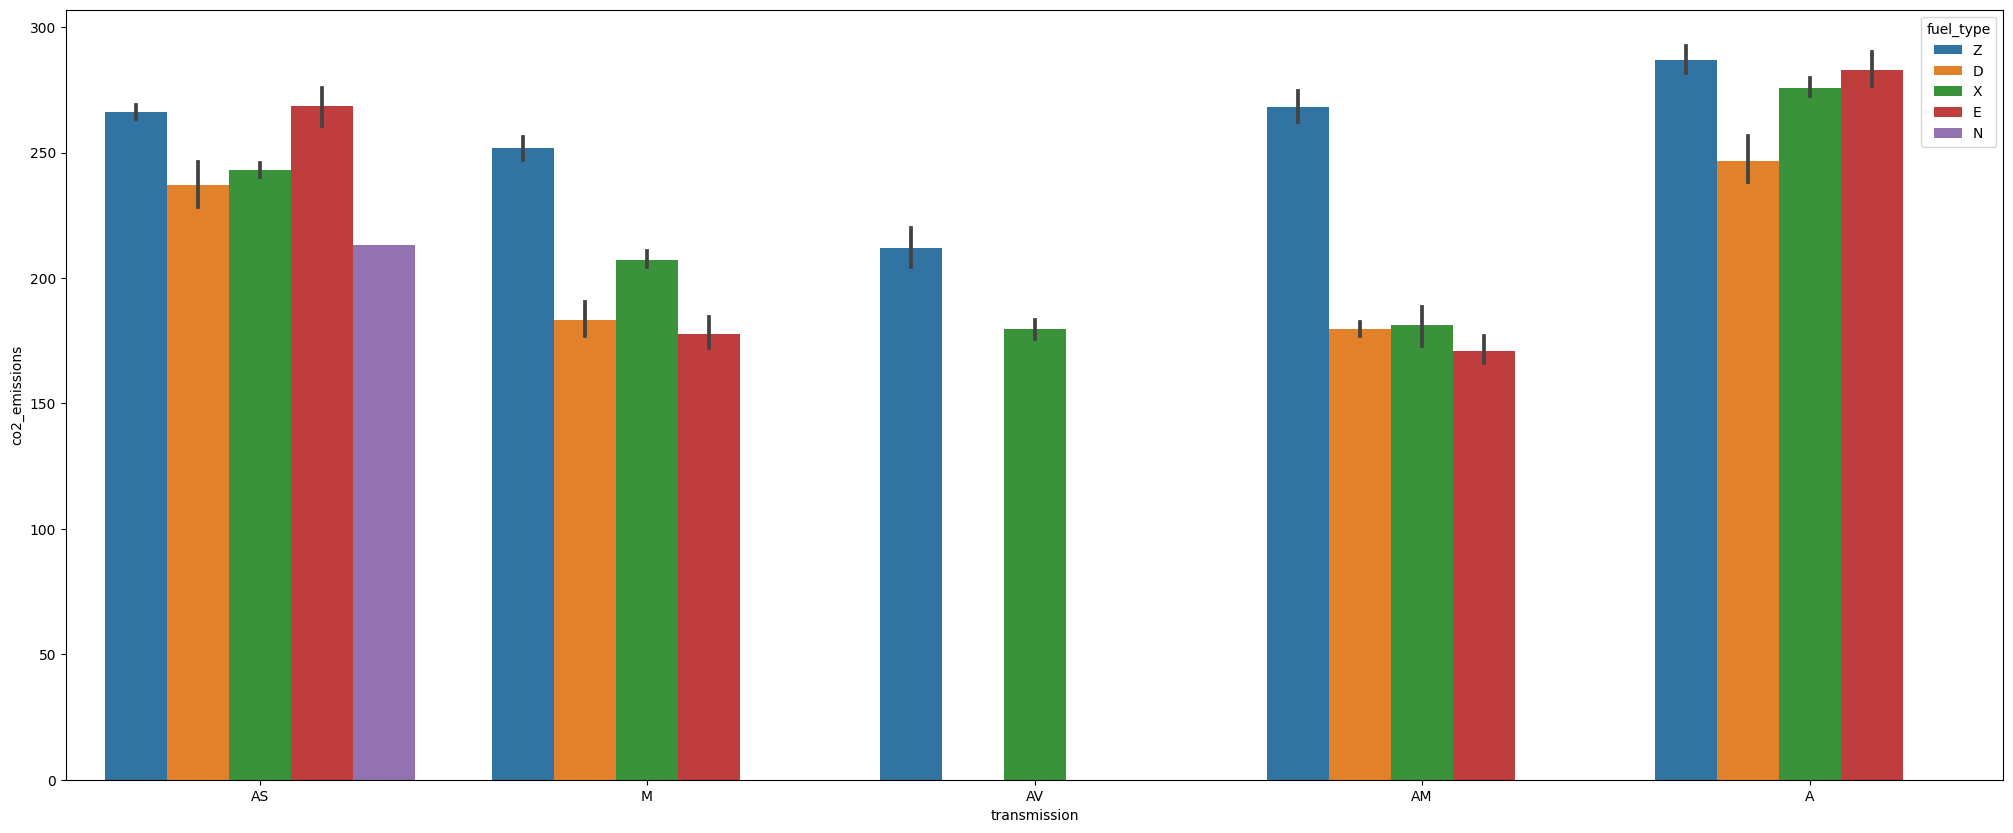

In [76]:
plt.subplots(figsize=(25,10))
sns.barplot(data=ems,x='transmission',y='co2_emissions',hue='fuel_type')

<Axes: xlabel='fuel_type', ylabel='co2_emissions'>

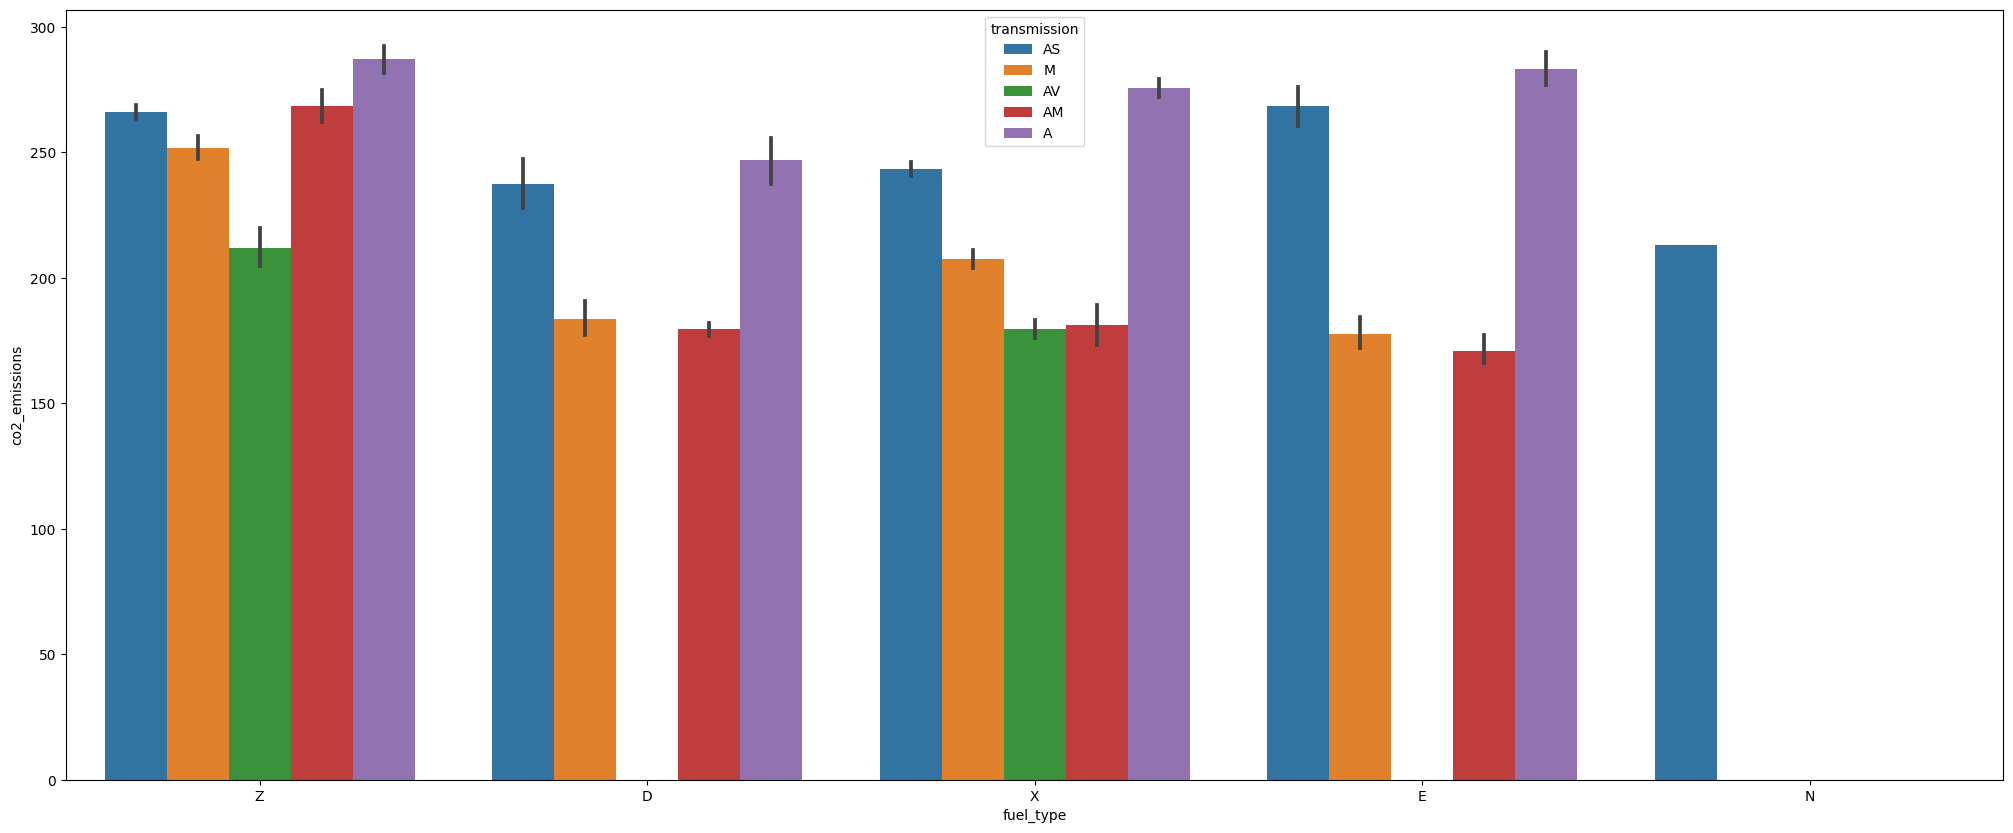

In [77]:
plt.subplots(figsize=(25,10))
sns.barplot(data=ems,x='fuel_type',y='co2_emissions',hue='transmission')

{'whiskers': [<matplotlib.lines.Line2D at 0x7f06b402a5f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7f06b402ab30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f06b402a350>],
 'medians': [<matplotlib.lines.Line2D at 0x7f06b402b070>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f06b402b310>],
 'means': []}

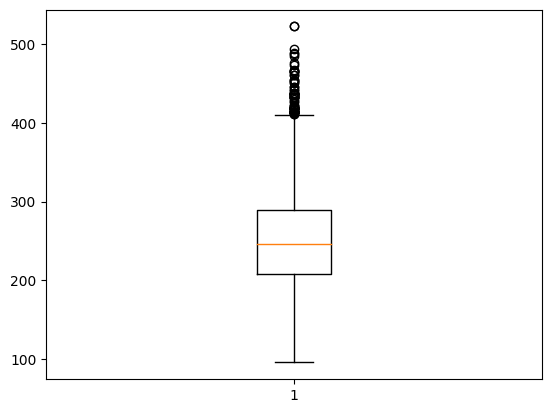

In [78]:
plt.boxplot(ems['co2_emissions'])

In [79]:
Q1 = ems['co2_emissions'].quantile(0.25)
Q3 = ems['co2_emissions'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR
print(lower)
print(upper)

86.5
410.5


In [80]:
np.where(ems['co2_emissions']> 410.5)

(array([  75,  223,  224,  225,  226,  227,  228,  349,  350,  391,  447,
         448,  449,  450,  451,  452,  637,  758, 1140, 1291, 1292, 1293,
        1294, 1295, 1296, 1297, 1298, 1450, 1451, 1452, 1453, 1454, 1455,
        1456, 1457, 1615, 1616, 1618, 1704, 1705, 2226, 2227, 2455, 2456,
        2661, 2662, 2759, 2760, 3115, 3153, 3300, 3301, 3506, 3507, 3702,
        3703, 3704, 3705, 3783, 3784, 4195, 4490, 4511, 4512, 4513, 4514,
        4576, 4577, 4828, 4891, 5286, 5321, 5322, 6112]),)

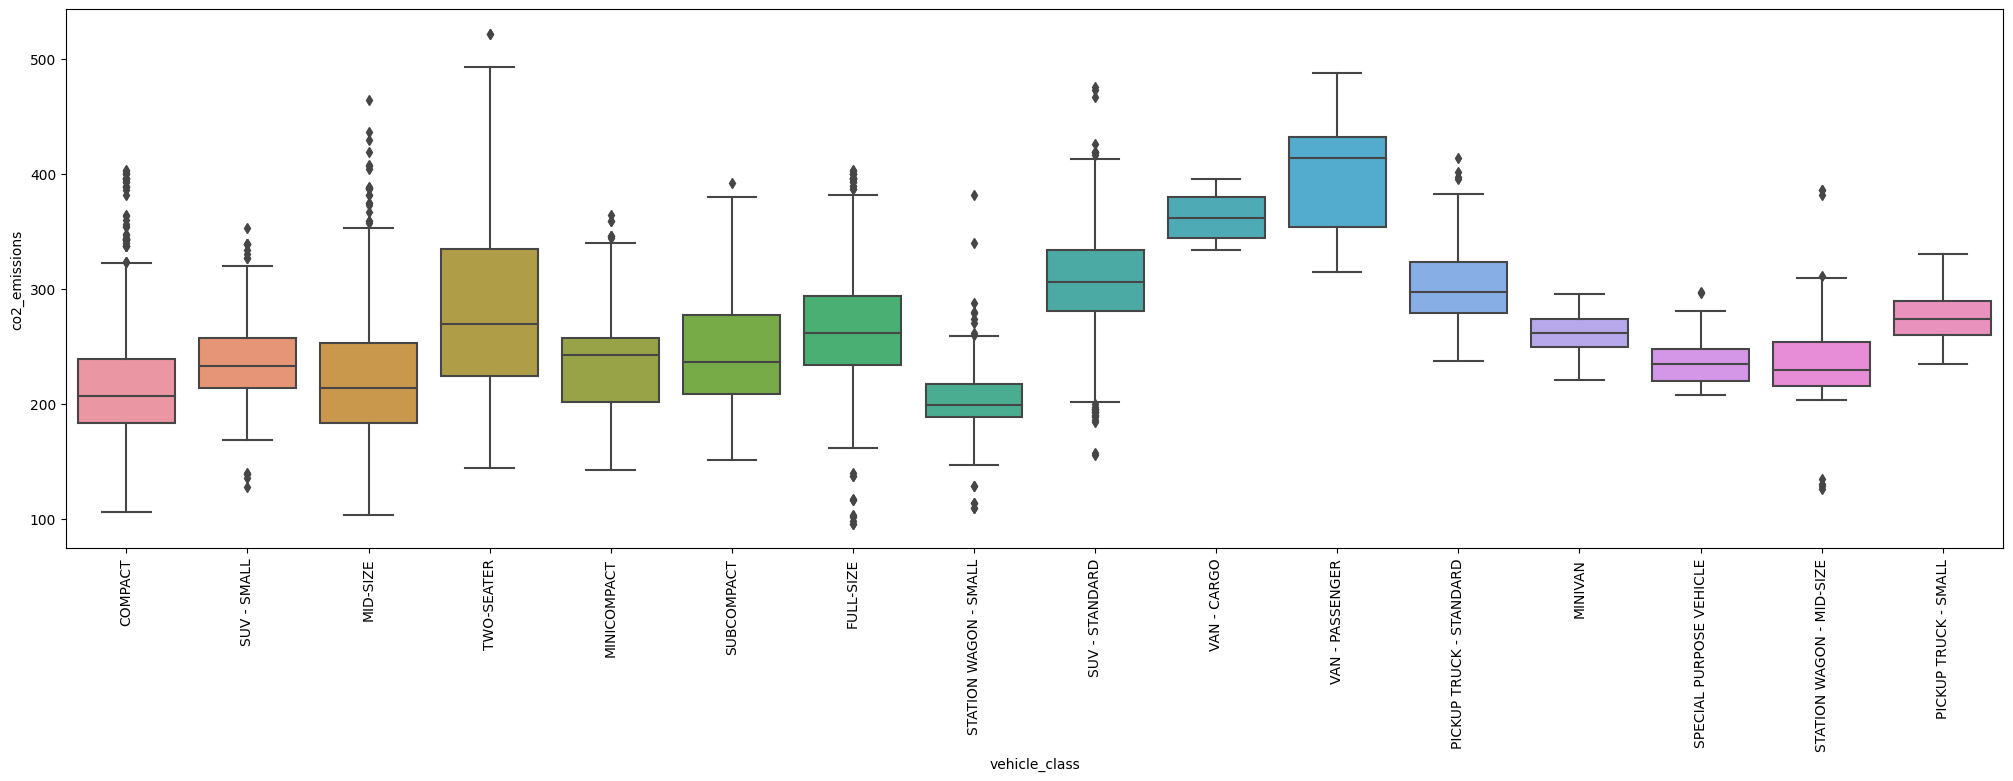

In [81]:
plt.subplots(figsize=(25,7))
sns.boxplot(x='vehicle_class',y='co2_emissions',data=ems)
plt.xticks(rotation=90)
plt.show()

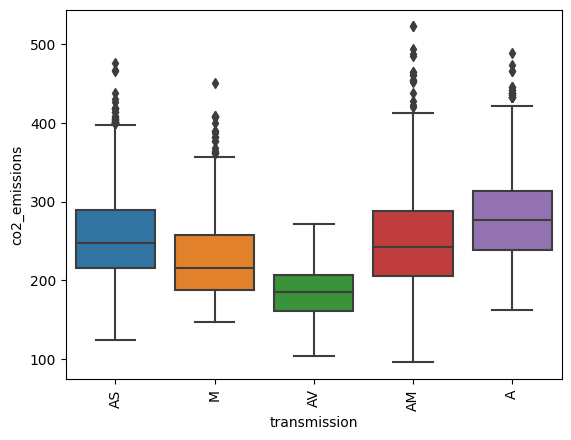

In [82]:
sns.boxplot(x='transmission',y='co2_emissions',data=ems)
plt.xticks(rotation=90)
plt.show()

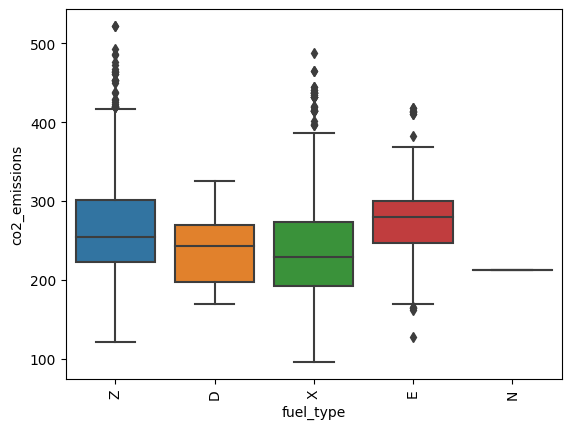

In [83]:
sns.boxplot(x='fuel_type',y='co2_emissions',data=ems)
plt.xticks(rotation=90)
plt.show()

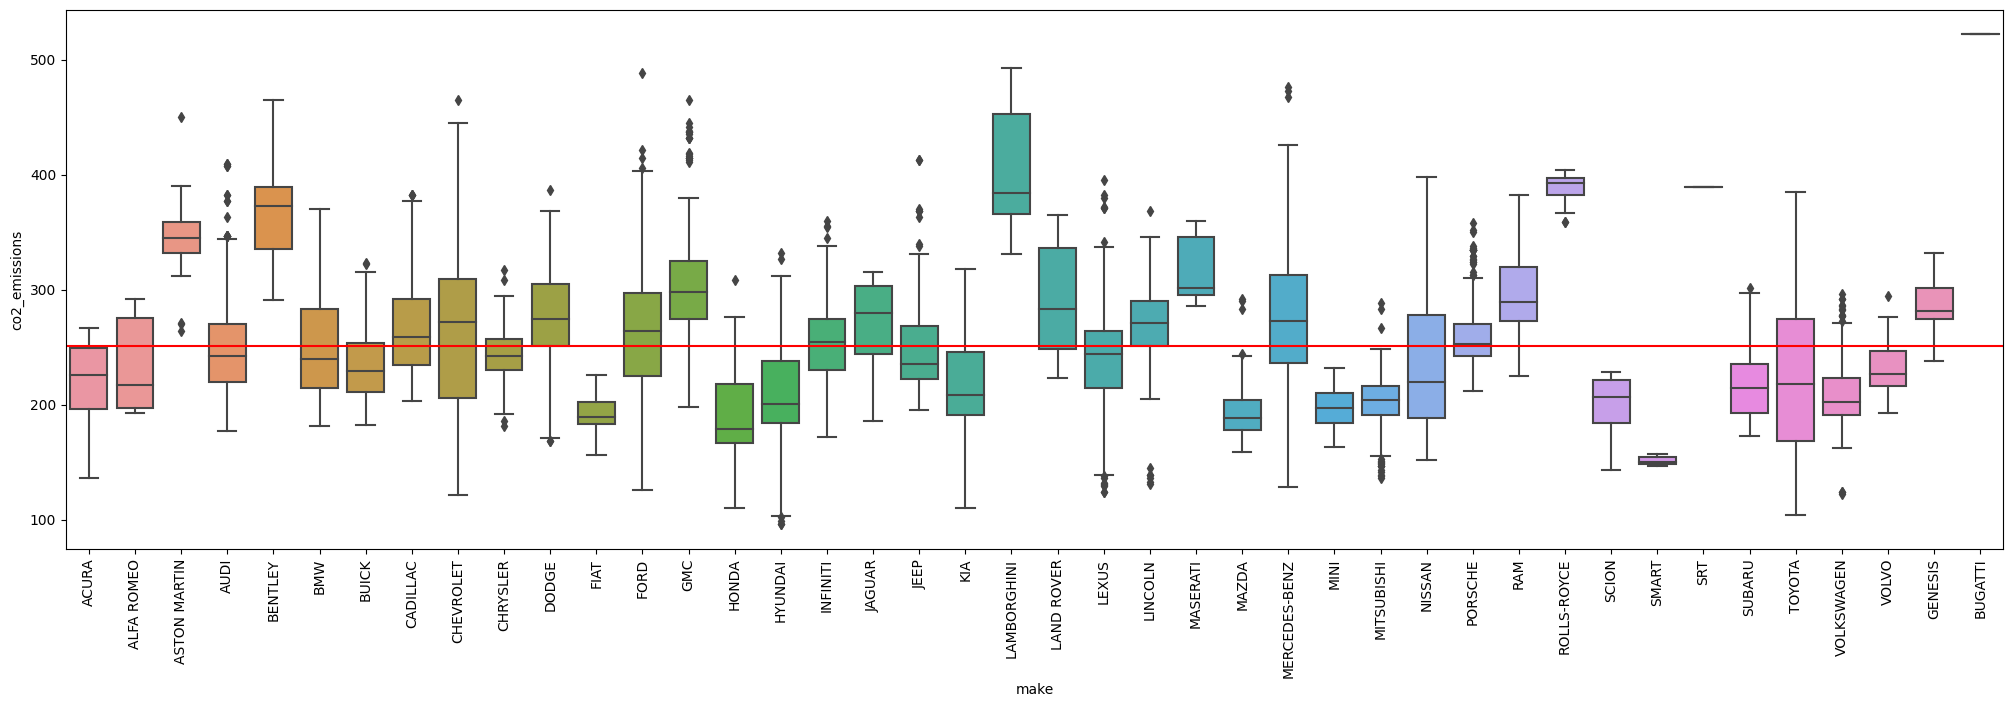

In [84]:
plt.subplots(figsize=(25,7))
sns.boxplot(x='make',y='co2_emissions',data=ems)
plt.xticks(rotation=90)
left, right = plt.xlim()
plt.hlines(ems['co2_emissions'].mean(),xmin=left, xmax=right,color='r')
plt.show()


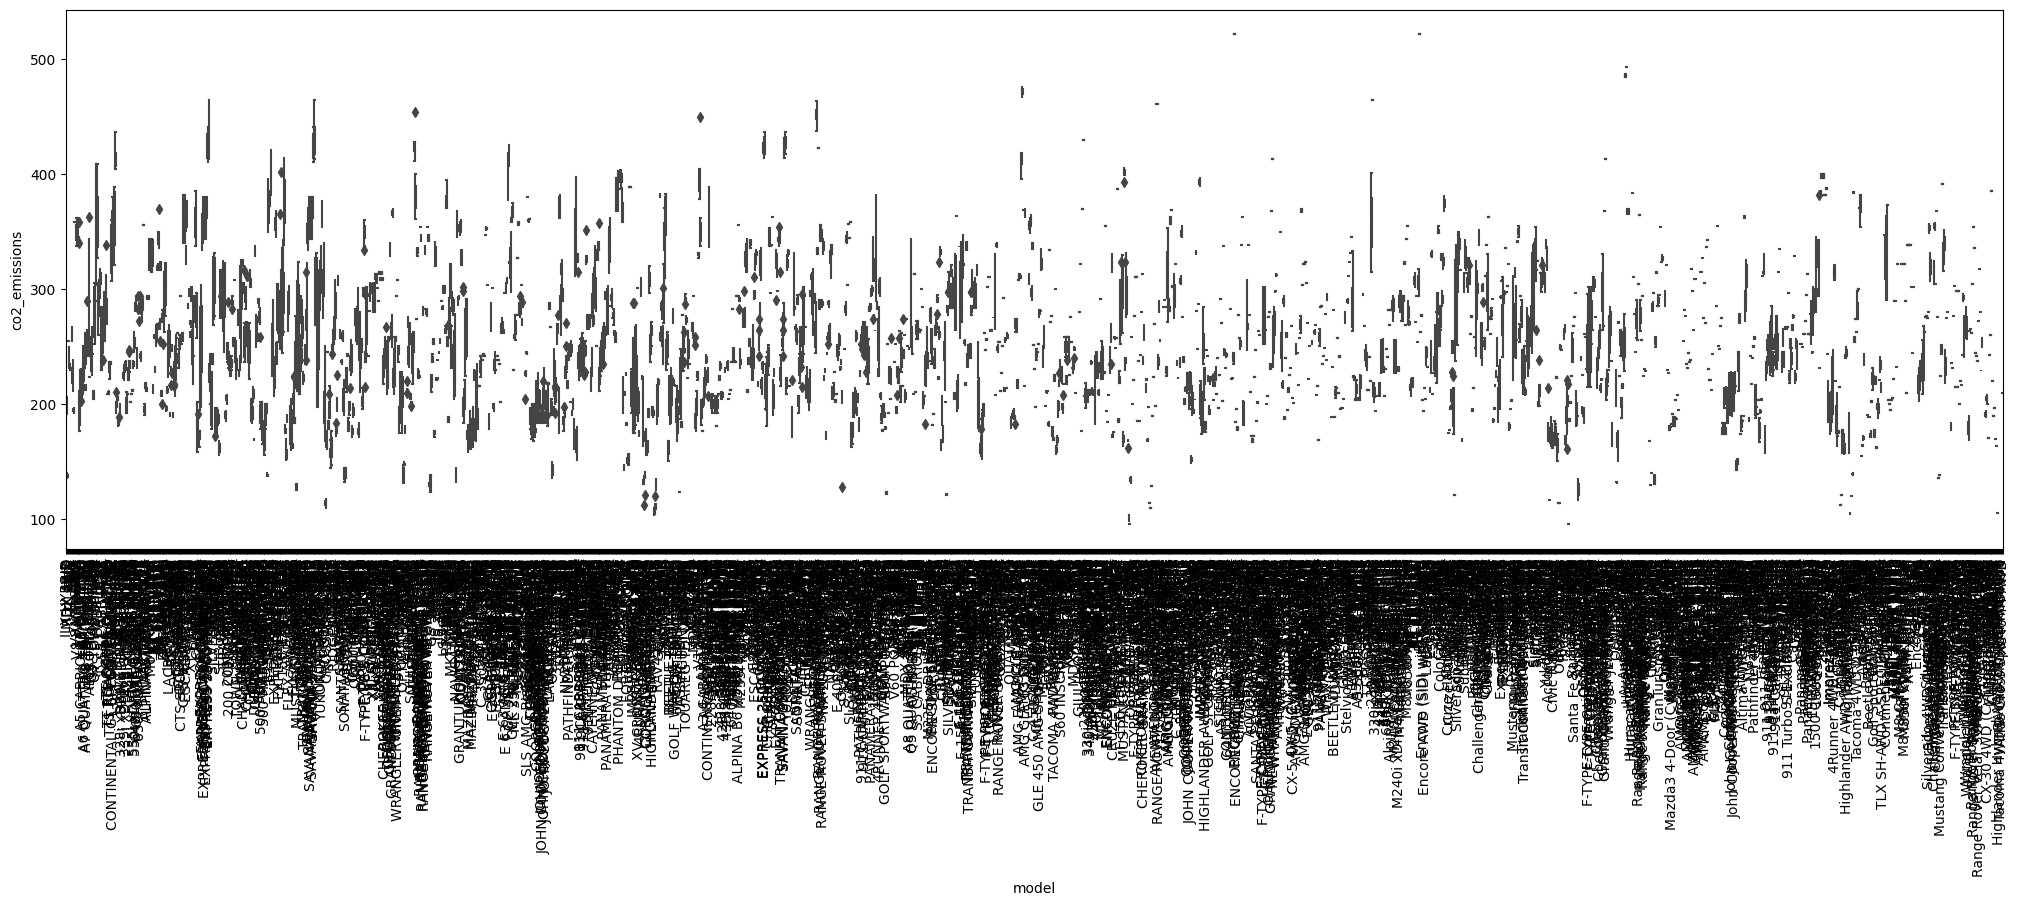

In [85]:
plt.subplots(figsize=(25,7))
sns.boxplot(x='model',y='co2_emissions',data=ems)
plt.xticks(rotation=90)
plt.show()

In [86]:
anova4=stats.f_oneway(ems_acura['co2_emissions'],ems_alfaromeo['co2_emissions'],ems_astonmartin['co2_emissions'],ems_audi['co2_emissions'],ems_bentley['co2_emissions'],ems_benz['co2_emissions'],ems_bmw['co2_emissions'],ems_bugatti['co2_emissions'],
               ems_buick['co2_emissions'],ems_cadillac['co2_emissions'],ems_chevrolet['co2_emissions'],ems_chrysler['co2_emissions'],ems_dodge['co2_emissions'],ems_fiat['co2_emissions'],ems_ford['co2_emissions'],ems_genesis['co2_emissions'],
               ems_gmc['co2_emissions'],ems_honda['co2_emissions'],ems_hyundai['co2_emissions'],ems_infiniti['co2_emissions'],ems_jaguar['co2_emissions'],ems_jeep['co2_emissions'],ems_kia['co2_emissions'],ems_lamb['co2_emissions'],
               ems_landrover['co2_emissions'],ems_lexus['co2_emissions'],ems_lincoln['co2_emissions'],ems_mini['co2_emissions'],ems_mitsubishi['co2_emissions'],ems_maserati['co2_emissions'],ems_mazda['co2_emissions'],ems_nissan['co2_emissions'],
               ems_porsche['co2_emissions'],ems_ram['co2_emissions'],ems_rollsroyce['co2_emissions'],ems_scion['co2_emissions'],ems_smart['co2_emissions'],ems_srt['co2_emissions'],ems_subaru['co2_emissions'],ems_toyota['co2_emissions'],
               ems_volkswagen['co2_emissions'],ems_volvo['co2_emissions'])
print('Anova Test for Make : ',anova4)

Anova Test for Make :  F_onewayResult(statistic=89.49476817697801, pvalue=0.0)


In [87]:
ems['vehicle_class'].unique()

array(['COMPACT', 'SUV - SMALL', 'MID-SIZE', 'TWO-SEATER', 'MINICOMPACT',
       'SUBCOMPACT', 'FULL-SIZE', 'STATION WAGON - SMALL',
       'SUV - STANDARD', 'VAN - CARGO', 'VAN - PASSENGER',
       'PICKUP TRUCK - STANDARD', 'MINIVAN', 'SPECIAL PURPOSE VEHICLE',
       'STATION WAGON - MID-SIZE', 'PICKUP TRUCK - SMALL'], dtype=object)

NULL HYPOTHESIS :- All the means are similar

ALTERNATE HYPOTHESIS :- Atleast one mean is different from the rest of the means

In [88]:
v1=ems[ems['vehicle_class']=='COMPACT']
v2=ems[ems['vehicle_class']=='SUV - SMALL']
v3=ems[ems['vehicle_class']=='MID-SIZE']
v4=ems[ems['vehicle_class']=='TWO-SEATER']
v5=ems[ems['vehicle_class']=='MINICOMPACT']
v6=ems[ems['vehicle_class']=='SUBCOMPACT']
v7=ems[ems['vehicle_class']=='FULL-SIZE']
v8=ems[ems['vehicle_class']=='STATION WAGON - SMALL']
v9=ems[ems['vehicle_class']=='SUV - STANDARD']
v10=ems[ems['vehicle_class']=='VAN - CARGO']
v11=ems[ems['vehicle_class']=='VAN - PASSENGER']
v12=ems[ems['vehicle_class']=='PICKUP TRUCK - STANDARD']
v13=ems[ems['vehicle_class']=='MINIVAN']
v14=ems[ems['vehicle_class']=='SPECIAL PURPOSE VEHICLE']
v15=ems[ems['vehicle_class']=='STATION WAGON - MID-SIZE']
v16=ems[ems['vehicle_class']=='PICKUP TRUCK - SMALL']

In [89]:
from scipy import stats
anova1=stats.f_oneway(v1['co2_emissions'],v2['co2_emissions'],v3['co2_emissions'],v4['co2_emissions'],v5['co2_emissions'],v6['co2_emissions'],v7['co2_emissions'],v8['co2_emissions'],
               v9['co2_emissions'],v10['co2_emissions'],v11['co2_emissions'],v12['co2_emissions'],v13['co2_emissions'],v14['co2_emissions'],v15['co2_emissions'],v16['co2_emissions'])
print('Anova Test for Vehicle Class : ',anova1)

Anova Test for Vehicle Class :  F_onewayResult(statistic=235.48292606361045, pvalue=0.0)


In [90]:
f1=ems[ems['fuel_type']=='X']
f2=ems[ems['fuel_type']=='Z']
f3=ems[ems['fuel_type']=='D']
f4=ems[ems['fuel_type']=='E']
f5=ems[ems['fuel_type']=='N']

In [91]:
anova2=stats.f_oneway(f1['co2_emissions'],f2['co2_emissions'],f3['co2_emissions'],f4['co2_emissions'],f5['co2_emissions'])
print('Anova Test for Fuel Type : ',anova2)

Anova Test for Fuel Type :  F_onewayResult(statistic=115.90710804042206, pvalue=1.621427752556494e-95)


In [92]:
t1=ems[ems['transmission']=='AS']
t2=ems[ems['transmission']=='AV']
t3=ems[ems['transmission']=='AM']
t4=ems[ems['transmission']=='A']
t5=ems[ems['transmission']=='M']

In [93]:
anova3=stats.f_oneway(t1['co2_emissions'],t2['co2_emissions'],t3['co2_emissions'],t4['co2_emissions'],t5['co2_emissions'])
print('Anova Test for Transmission : ',anova3)

Anova Test for Transmission :  F_onewayResult(statistic=325.5740652931516, pvalue=6.237286146914172e-255)


In [94]:
ems[ems['cylinders']==10]

,make,model,vehicle_class,engine_size,cylinders,transmission,fuel_type,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions
47,AUDI,R8,TWO-SEATER,5.2,10,A,Z,18.2,10.6,14.8,19,347
48,AUDI,R8,TWO-SEATER,5.2,10,M,Z,21.1,13.8,17.8,16,409
51,AUDI,R8 SPYDER,TWO-SEATER,5.2,10,A,Z,18.2,10.6,14.8,19,347
52,AUDI,R8 SPYDER,TWO-SEATER,5.2,10,M,Z,21.1,13.8,17.8,16,409
349,FORD,E350 WAGON,VAN - PASSENGER,6.8,10,A,X,23.9,17.8,21.2,13,488
638,LAMBORGHINI,GALLARDO COUPE,TWO-SEATER,5.2,10,A,Z,18.0,12.8,15.7,18,361
639,LAMBORGHINI,GALLARDO COUPE,TWO-SEATER,5.2,10,M,Z,20.6,13.5,17.4,16,400
945,SRT,VIPER COUPE,TWO-SEATER,8.4,10,M,Z,20.0,13.0,16.9,17,389
946,SRT,VIPER GTS COUPE,TWO-SEATER,8.4,10,M,Z,20.0,13.0,16.9,17,389
1125,AUDI,R8,TWO-SEATER,5.2,10,AM,Z,18.2,10.6,14.8,19,347


In [95]:
def norm_func(i):
    # Calculate normalized values by scaling each column in 'i' between 0 and 1
    x = (i - i.min()) / (i.max() - i.min())
    return x

# Apply the 'norm_ems' function to normalize the numerical columns in the 'churn' dataset (columns from index 3 onwards)
# Store the normalized dataset in 'churn_norm'

In [96]:
#sns.heatmap(ems_m.corr())

In [97]:
# Apply the 'norm_ems' function to normalize the numerical columns in the 'churn' dataset (columns from index 3 onwards)
# Store the normalized dataset in 'churn_norm'
ems_norm= norm_func(ems.iloc[:,7:11])
ems_norm_cyl=norm_func(ems.iloc[:,4])
ems_norm_eng=norm_func(ems.iloc[:,3])
ems_norm['co2_emission']=ems['co2_emissions']
ems_norm['make']=ems['make']
ems_norm['model']=ems['model']
ems_norm['vehicle_class']=ems['vehicle_class']
ems_norm['transmission']=ems['transmission']
ems_norm['fuel_type']=ems['fuel_type']
ems_norm['engine']=ems_norm_eng
ems_norm['cylinder']=ems_norm_cyl
ems_norm['transmission']=ems['transmission']
ems_norm['fuel_type']=ems['fuel_type']
ems_norm.rename(columns={'fuel_consumption_comb(l/100km)':'fuel_both','fuel_consumption_comb(mpg)':'fuel_both_mpg'},inplace=True)
ems_norm

,fuel_consumption_city,fuel_consumption_hwy,fuel_both,fuel_both_mpg,co2_emission,make,model,vehicle_class,transmission,fuel_type,engine,cylinder
0,0.215909,0.162651,0.200000,0.379310,196,ACURA,ILX,COMPACT,AS,Z,0.146667,0.076923
1,0.265152,0.222892,0.250000,0.310345,221,ACURA,ILX,COMPACT,M,Z,0.200000,0.076923
2,0.068182,0.108434,0.081818,0.637931,136,ACURA,ILX HYBRID,COMPACT,AV,Z,0.080000,0.076923
3,0.321970,0.307229,0.318182,0.241379,255,ACURA,MDX 4WD,SUV - SMALL,AS,Z,0.346667,0.230769
4,0.299242,0.283133,0.295455,0.275862,244,ACURA,RDX AWD,SUV - SMALL,AS,Z,0.346667,0.230769
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,0.246212,0.222892,0.240909,0.327586,219,VOLVO,XC40 T5 AWD,SUV - SMALL,AS,Z,0.146667,0.076923
7381,0.265152,0.259036,0.263636,0.310345,232,VOLVO,XC60 T5 AWD,SUV - SMALL,AS,Z,0.146667,0.076923
7382,0.284091,0.277108,0.281818,0.275862,240,VOLVO,XC60 T6 AWD,SUV - SMALL,AS,Z,0.146667,0.076923
7383,0.265152,0.259036,0.263636,0.310345,232,VOLVO,XC90 T5 AWD,SUV - STANDARD,AS,Z,0.146667,0.076923


Experimantal Dummies

In [98]:
ems_norm_1= norm_func(ems.iloc[:,7:])
ems_norm_cyl=norm_func(ems.iloc[:,4])
ems_norm_eng=norm_func(ems.iloc[:,3])
ems_norm_1['make']=ems['make']
ems_norm_1['model']=ems['model']
ems_norm_1['vehicle_class']=ems['vehicle_class']
ems_norm_1['transmission']=ems['transmission']
ems_norm_1['fuel_type']=ems['fuel_type']
ems_norm_1['engine']=ems_norm_eng
ems_norm_1['cylinder']=ems_norm_cyl
ems_norm.rename(columns={'fuel_consumption_comb(l/100km)':'fuel_both','fuel_consumption_comb(mpg)':'fuel_both_mpg'},inplace=True)
ems_norm_1=pd.get_dummies(ems_norm_1,columns=['make','model','vehicle_class','transmission','fuel_type'])
ems_norm_1

,fuel_consumption_city,fuel_consumption_hwy,fuel_consumption_comb(l/100km),fuel_consumption_comb(mpg),co2_emissions,engine,cylinder,make_ACURA,make_ALFA ROMEO,make_ASTON MARTIN,...,transmission_A,transmission_AM,transmission_AS,transmission_AV,transmission_M,fuel_type_D,fuel_type_E,fuel_type_N,fuel_type_X,fuel_type_Z
0,0.215909,0.162651,0.200000,0.379310,0.234742,0.146667,0.076923,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0.265152,0.222892,0.250000,0.310345,0.293427,0.200000,0.076923,1,0,0,...,0,0,0,0,1,0,0,0,0,1
2,0.068182,0.108434,0.081818,0.637931,0.093897,0.080000,0.076923,1,0,0,...,0,0,0,1,0,0,0,0,0,1
3,0.321970,0.307229,0.318182,0.241379,0.373239,0.346667,0.230769,1,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0.299242,0.283133,0.295455,0.275862,0.347418,0.346667,0.230769,1,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7380,0.246212,0.222892,0.240909,0.327586,0.288732,0.146667,0.076923,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7381,0.265152,0.259036,0.263636,0.310345,0.319249,0.146667,0.076923,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7382,0.284091,0.277108,0.281818,0.275862,0.338028,0.146667,0.076923,0,0,0,...,0,0,1,0,0,0,0,0,0,1
7383,0.265152,0.259036,0.263636,0.310345,0.319249,0.146667,0.076923,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [99]:
import statsmodels.api as sm
y=ems_norm_1['co2_emissions']
x=ems_norm_1.drop(['co2_emissions'],axis=1)
model=sm.OLS(y,x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          co2_emissions   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                     681.3
Date:                Tue, 05 Dec 2023   Prob (F-statistic):               0.00
Time:                        03:35:35   Log-Likelihood:                 21738.
No. Observations:                6273   AIC:                        -3.932e+04
Df Residuals:                    4197   BIC:                        -2.532e+04
Df Model:                        2075                                         
Covariance Type:            nonrobust                                         
===================================================================================================================
                                                      coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------------------------
fuel_consumption_city                               0.3156      0.052      6.077      0.000       0.214       0.417
fuel_consumption_hwy                                0.1424      0.028      5.103      0.000       0.088       0.197
fuel_consumption_comb(l/100km)                      0.2144      0.078      2.741      0.006       0.061       0.368
fuel_consumption_comb(mpg)                         -0.4466      0.010    -46.971      0.000      -0.465      -0.428
engine                                              0.0356      0.006      6.232      0.000       0.024       0.047
cylinder                                            0.0141      0.007      2.107      0.035       0.001       0.027
make_ACURA                                         -0.0061      0.002     -3.169      0.002      -0.010      -0.002
make_ALFA ROMEO                                     0.0052      0.002      2.232      0.026       0.001       0.010
make_ASTON MARTIN                                   0.0156      0.004      3.700      0.000       0.007       0.024
make_AUDI                                          -0.0011      0.002     -0.661      0.509      -0.004       0.002
make_BENTLEY                                        0.0335      0.003     12.651      0.000       0.028       0.039
make_BMW                                           -0.0032      0.001     -2.196      0.028      -0.006      -0.000
make_BUGATTI                                        0.0903      0.005     18.125      0.000       0.081       0.100
make_BUICK                                          0.0064      0.002      2.989      0.003       0.002       0.011
make_CADILLAC                                       0.0004      0.001      0.286      0.775      -0.002       0.003
make_CHEVROLET                                      0.0106      0.002      6.358      0.000       0.007       0.014
make_CHRYSLER                                       0.0030      0.003      1.182      0.237      -0.002       0.008
make_DODGE                                          0.0080      0.002      4.724      0.000       0.005       0.011
make_FIAT                                           0.0076      0.004      1.989      0.047       0.000       0.015
make_FORD                                           0.0126      0.002      6.893      0.000       0.009       0.016
make_GENESIS                                        0.0042      0.003      1.318      0.188      -0.002       0.010
make_GMC                                            0.0056      0.004      1.282      0.200      -0.003       0.014
make_HONDA                                          0.0170      0.002      9.626      0.000       0.014       0.020
make_HYUNDAI                                        0.0208      0.0

- The Features when compared to CO2 Emissions we can see that the P values of Fuel Comsumption in City, Fuel consumption in Highway, Fuel consumption in both, Fuel consumption MPG, Engine Size, Cylinders, Vehicle Class, Transmission and Fuel Type are less than 0.05. So we will consider them for model and checl for multi collinearity usinf VIF.

- The P values for 11 unique Make's are more than 0.05 and there are many records with P values greater than 0.05 for Model.

In [100]:
ems_norm_2= norm_func(ems.iloc[:,7:])
ems_norm_cyl=norm_func(ems.iloc[:,4])
ems_norm_eng=norm_func(ems.iloc[:,3])
ems_norm_2['vehicle_class']=ems['vehicle_class']
ems_norm_2['transmission']=ems['transmission']
ems_norm_2['fuel_type']=ems['fuel_type']
ems_norm_2['make']=ems['make']
ems_norm_2['model']=ems['model']
ems_norm_2['engine']=ems_norm_eng
ems_norm_2['cylinder']=ems_norm_cyl
ems_norm_2.rename(columns={'fuel_consumption_comb(l/100km)':'fuel_both','fuel_consumption_comb(mpg)':'fuel_both_mpg'},inplace=True)
ems_norm_2

,fuel_consumption_city,fuel_consumption_hwy,fuel_both,fuel_both_mpg,co2_emissions,vehicle_class,transmission,fuel_type,make,model,engine,cylinder
0,0.215909,0.162651,0.200000,0.379310,0.234742,COMPACT,AS,Z,ACURA,ILX,0.146667,0.076923
1,0.265152,0.222892,0.250000,0.310345,0.293427,COMPACT,M,Z,ACURA,ILX,0.200000,0.076923
2,0.068182,0.108434,0.081818,0.637931,0.093897,COMPACT,AV,Z,ACURA,ILX HYBRID,0.080000,0.076923
3,0.321970,0.307229,0.318182,0.241379,0.373239,SUV - SMALL,AS,Z,ACURA,MDX 4WD,0.346667,0.230769
4,0.299242,0.283133,0.295455,0.275862,0.347418,SUV - SMALL,AS,Z,ACURA,RDX AWD,0.346667,0.230769
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,0.246212,0.222892,0.240909,0.327586,0.288732,SUV - SMALL,AS,Z,VOLVO,XC40 T5 AWD,0.146667,0.076923
7381,0.265152,0.259036,0.263636,0.310345,0.319249,SUV - SMALL,AS,Z,VOLVO,XC60 T5 AWD,0.146667,0.076923
7382,0.284091,0.277108,0.281818,0.275862,0.338028,SUV - SMALL,AS,Z,VOLVO,XC60 T6 AWD,0.146667,0.076923
7383,0.265152,0.259036,0.263636,0.310345,0.319249,SUV - STANDARD,AS,Z,VOLVO,XC90 T5 AWD,0.146667,0.076923


In [101]:
r2_e=smf.ols('engine~cylinder+fuel_consumption_city+fuel_consumption_hwy+fuel_both+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_e=1/(1-r2_e)

r2_c=smf.ols('cylinder~engine+fuel_consumption_city+fuel_consumption_hwy+fuel_both+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_c=1/(1-r2_c)

r2_fc=smf.ols('fuel_consumption_city~engine+cylinder+fuel_consumption_hwy+fuel_both+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_fc=1/(1-r2_fc)

r2_fh=smf.ols('fuel_consumption_hwy~engine+cylinder+fuel_consumption_city+fuel_both+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_fh=1/(1-r2_fh)

r2_fl=smf.ols('fuel_both~engine+cylinder+fuel_consumption_city+fuel_consumption_hwy+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_fl=1/(1-r2_fl)

r2_fm=smf.ols('fuel_both_mpg~engine+cylinder+fuel_consumption_city+fuel_consumption_hwy+fuel_both',data=ems_norm_2).fit().rsquared
vif_fm=1/(1-r2_fm)


df={'Variables':['engine size','cylinder','fuel consumption city','fuel consumption hwy','fuel both l/100 km','fuel both mpg'],'Vif':[vif_e,vif_c,vif_fc,vif_fh,vif_fl,vif_fm]}
CO2_VIF=pd.DataFrame(df)
CO2_VIF

,Variables,Vif
0,engine size,8.759911
1,cylinder,7.718799
2,fuel consumption city,2221.757014
3,fuel consumption hwy,623.065553
4,fuel both l/100 km,5038.416323
5,fuel both mpg,7.300977


In [102]:
r2_c=smf.ols('cylinder~fuel_consumption_hwy+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_c=1/(1-r2_c)

r2_fh=smf.ols('fuel_consumption_hwy~cylinder+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_fh=1/(1-r2_fh)

r2_fm=smf.ols('fuel_both_mpg~cylinder+fuel_consumption_hwy',data=ems_norm_2).fit().rsquared
vif_fm=1/(1-r2_fm)


df={'Variables':['cylinder','fuel consumption highway','Miles per gallon'],'Vif':[vif_c,vif_fh,vif_fm]}
CO2_VIF=pd.DataFrame(df)
CO2_VIF

,Variables,Vif
0,cylinder,2.219369
1,fuel consumption highway,5.173400
2,Miles per gallon,5.283641


In [103]:
r2_fc=smf.ols('fuel_consumption_city~make+model+vehicle_class+cylinder+transmission+fuel_type+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_fc=1/(1-r2_fc)
vif_fc

101.0594219848978

In [104]:
r2_fl=smf.ols('fuel_both~make+model+vehicle_class+cylinder+transmission+fuel_type+fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_fl=1/(1-r2_fl)
vif_fl

114.3325552305264

In [105]:
r2_c=smf.ols('cylinder~fuel_both_mpg',data=ems_norm_2).fit().rsquared
vif_c=1/(1-r2_c)

r2_fm=smf.ols('fuel_both_mpg~cylinder',data=ems_norm_2).fit().rsquared
vif_fm=1/(1-r2_fm)


df={'Variables':['cylinder','Miles per gallon'],'Vif':[vif_c,vif_fm]}
CO2_VIF=pd.DataFrame(df)
CO2_VIF

,Variables,Vif
0,cylinder,2.103838
1,Miles per gallon,2.103838


In [106]:
r2_fh=smf.ols('fuel_consumption_hwy~cylinder',data=ems_norm_2).fit().rsquared
vif_fh=1/(1-r2_fh)
vif_fh

2.059941975244045

We are considering the following features for model building
- Vehicle Class
- Cylinders
- Transmission
- Fuel Type
- Miles Per Gallon


# Model Building and Cross Validation

- Multi Linear Regression Without Considering Vehicle Class

In [107]:
ems_1=ems.copy()
ems_1=pd.get_dummies(ems,columns=['transmission','fuel_type'])
#ems_1['fuel_consumption_comb(mpg)']=norm_func(ems_1['fuel_consumption_comb(mpg)'])

a=ems_1.drop(['make','model','vehicle_class','engine_size','fuel_consumption_city','fuel_consumption_hwy','fuel_consumption_comb(l/100km)','co2_emissions'],axis=1)
b=ems_1['co2_emissions']

lr=LinearRegression()
a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=42)

experiment=lr.fit(a_train,b_train)

b_pred=experiment.predict(a_test)

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

cv_results_r2 = cross_val_score(experiment, a, b, cv=kf, scoring='r2')
rmse = np.sqrt(mean_squared_error(b_test,b_pred))
mae = mean_absolute_error(b_test,b_pred)
print( 'Cross Valisation Result for R^2 Values using LINEAR REGRESSION Model : ',cv_results_r2)
print( 'RMSE Values using LINEAR REGRESSION Model : ',rmse)
print( 'Mean Absolute Error : ',mae)
ape3 = np.abs((b_test - b_pred) / b_test)
mapd1 = np.mean(ape3) * 100
print(f'Mean Absolute Percentage Deviation: {mapd1} %')
result_pred = pd.DataFrame({"Pred_LR": b_pred, "Real_Value": b_test.values})
result_pred["Pred_LR"] = result_pred["Pred_LR"].round(2)
result_pred["Diff"] = result_pred["Pred_LR"] - result_pred["Real_Value"]
print(result_pred.head(10))

Cross Valisation Result for R^2 Values using LINEAR REGRESSION Model :  [0.93009577 0.92619462 0.92693141 0.91791231 0.91809362]
RMSE Values using LINEAR REGRESSION Model :  16.859877322377454
Mean Absolute Error :  11.073396173634043
Mean Absolute Percentage Deviation: 4.507707073841329 %
   Pred_LR  Real_Value   Diff
0   182.44         189  -6.56
1   267.37         242  25.37
2   227.50         234  -6.50
3   313.91         306   7.91
4   164.70         172  -7.30
5   307.63         290  17.63
6   286.03         285   1.03
7   164.70         172  -7.30
8   171.16         169   2.16
9   240.06         244  -3.94


- Multi Linear Regression Considering Vehicle Class

In [108]:
ems_1=ems.copy()
ems_1=pd.get_dummies(ems,columns=['vehicle_class','transmission','fuel_type'])
#ems_1['fuel_consumption_comb(mpg)']=norm_func(ems_1['fuel_consumption_comb(mpg)'])

a=ems_1.drop(['make','model','engine_size','fuel_consumption_city','fuel_consumption_hwy','fuel_consumption_comb(l/100km)','co2_emissions'],axis=1)
b=ems_1['co2_emissions']

a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=42)

experiment=lr.fit(a_train,b_train)

b_pred=experiment.predict(a_test)

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

cv_results = cross_val_score(experiment, a, b, cv=kf, scoring='r2')
rmse = np.sqrt(mean_squared_error(b_test,b_pred))
mae = mean_absolute_error(b_test,b_pred)
print( 'Cross Valisation Result for R^2 Values using LINEAR REGRESSION Model : ',cv_results)
print( 'RMSE Values using LINEAR REGRESSION Model : ',rmse)
print( 'Mean Absolute Error : ',mae)
ape2 = np.abs((b_test - b_pred) / b_test)
mapd2 = np.mean(ape2) * 100
print(f'Mean Absolute Percentage Deviation: {mapd2} %')
result_pred = pd.DataFrame({"Pred_LR": b_pred, "Real_Value": b_test.values})
result_pred["Pred_LR"] = result_pred["Pred_LR"].round(2)
result_pred["Diff"] = result_pred["Pred_LR"] - result_pred["Real_Value"]
print(result_pred.head(10))

Cross Valisation Result for R^2 Values using LINEAR REGRESSION Model :  [0.94606891 0.94574503 0.93925532 0.94351257 0.94682674]
RMSE Values using LINEAR REGRESSION Model :  14.179132065338639
Mean Absolute Error :  9.759861453238726
Mean Absolute Percentage Deviation: 3.98044730837203 %
   Pred_LR  Real_Value   Diff
0   180.55         189  -8.45
1   261.87         242  19.87
2   225.81         234  -8.19
3   308.20         306   2.20
4   165.28         172  -6.72
5   301.73         290  11.73
6   276.79         285  -8.21
7   165.28         172  -6.72
8   170.04         169   1.04
9   237.00         244  -7.00


- X G Boost

In [109]:
# Fit the regressor to the training set

xg_reg = XGBRegressor(objective='reg:squarederror', learning_rate=0.15, max_depth=5, alpha=10, n_estimators=10)
xgb=xg_reg.fit(a_train, b_train)

# Predict the labels of the test set
pred_xgb = xgb.predict(a_test)

n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True)

cv_results = cross_val_score(xgb, a, b, cv=kf, scoring='r2')
rmse = np.sqrt(mean_squared_error(b_test,pred_xgb))
mae = mean_absolute_error(b_test,pred_xgb)
print( 'Cross Valisation Result for R^2 Values using X G Boost Model : ',cv_results)
print( 'RMSE Values using X G Boost Model : ',rmse)
print( 'Mean Absolute Error : ',mae)
ape1 = np.abs((b_test - pred_xgb) / b_test)
mapd3 = np.mean(ape1) * 100
print(f'Mean Absolute Percentage Deviation: {mapd3} %')
result_pred = pd.DataFrame({"Pred_XGB": pred_xgb, "Real_Value": b_test.values})
result_pred["Pred_XGB"] = result_pred["Pred_XGB"].round(2)
result_pred["Diff"] = result_pred["Pred_XGB"] - result_pred["Real_Value"]
result_pred

Cross Valisation Result for R^2 Values using X G Boost Model :  [0.95046469 0.95021678 0.95152952 0.95062496 0.95057083]
RMSE Values using X G Boost Model :  13.368740116554115
Mean Absolute Error :  10.296610457583727
Mean Absolute Percentage Deviation: 4.315716122496455 %


,Pred_XGB,Real_Value,Diff
0,199.570007,189,10.570007
1,244.490005,242,2.490005
2,232.169998,234,-1.830002
3,300.250000,306,-5.750000
4,185.250000,172,13.250000
...,...,...,...
1250,213.750000,208,5.750000
1251,398.809998,417,-18.190002
1252,225.289993,226,-0.710007
1253,289.260010,292,-2.739990


- Random Forest Regressor Considering Vehicle Class

In [110]:
rf= RandomForestRegressor()
model_rf_1=rf.fit(a_train, b_train)
pred_rf_1=model_rf_1.predict(a_test)
n_splits = 5
kf = KFold(n_splits=n_splits)

cv_results = cross_val_score(model_rf_1, a, b, cv=kf, scoring='r2')
rmse = np.sqrt(mean_squared_error(b_test,pred_rf_1))
mae = mean_absolute_error(b_test,pred_rf_1)
print( 'Cross Valisation Result for R^2 Values using RANDOM FOREST REGRESSION Model : ',cv_results)
print( 'RMSE Values using RANDOM FOREST REGRESSION Model : ',rmse)
print( 'Mean Absolute Error : ',mae)
apee = np.abs((b_test - pred_rf_1) / b_test)
mapd4 = np.mean(apee) * 100
print(f'Mean Absolute Percentage Deviation: {mapd4} %')
result_pred = pd.DataFrame({"Pred_RF": pred_rf_1, "Real_Value": b_test.values})
result_pred["Pred_RF"] = result_pred["Pred_RF"].round(2)
result_pred["Diff"] = result_pred["Pred_RF"] - result_pred["Real_Value"]
result_pred

Cross Valisation Result for R^2 Values using RANDOM FOREST REGRESSION Model :  [0.98811579 0.99192684 0.99339114 0.99284668 0.99474015]
RMSE Values using RANDOM FOREST REGRESSION Model :  4.484894934444415
Mean Absolute Error :  3.2242316884965514
Mean Absolute Percentage Deviation: 1.25518242430918 %


,Pred_RF,Real_Value,Diff
0,185.95,189,-3.05
1,244.76,242,2.76
2,227.71,234,-6.29
3,310.09,306,4.09
4,169.65,172,-2.35
...,...,...,...
1250,205.28,208,-2.72
1251,421.08,417,4.08
1252,217.52,226,-8.48
1253,305.38,292,13.38


- Random Forest Regressor Without Considering  Vehicle Class

In [111]:
ems_1=ems.copy()
ems_1=pd.get_dummies(ems,columns=['transmission','fuel_type'])

a=ems_1.drop(['make','model','vehicle_class','engine_size','fuel_consumption_city','fuel_consumption_hwy','fuel_consumption_comb(l/100km)','co2_emissions'],axis=1)
b=ems_1['co2_emissions']

a_train,a_test,b_train,b_test=train_test_split(a,b,test_size=0.2,random_state=42)

model_rf=rf.fit(a_train, b_train)
pred_rf=model_rf.predict(a_test)
n_splits = 5
kf = KFold(n_splits=n_splits)

cv_results = cross_val_score(model_rf, a, b, cv=kf, scoring='r2')
rmse = np.sqrt(mean_squared_error(b_test,pred_rf))
mae = mean_absolute_error(b_test,pred_rf)
print( 'Cross Valisation Result for R^2 Values using RANDOM FOREST REGRESSION Model : ',cv_results)
print( 'RMSE Values using RANDOM FOREST REGRESSION Model : ',rmse)
print( 'Mean Absolute Error : ',mae)
ape = np.abs((b_test - pred_rf) / b_test)
map5 = np.mean(ape) * 100
print(f'Mean Absolute Percentage Deviation: {map5}%')
result_pred = pd.DataFrame({"Pred_RF": pred_rf, "Real_Value": b_test.values})
result_pred["Pred_RF"] = result_pred["Pred_RF"].round(2)
result_pred["Diff"] = result_pred["Pred_RF"] - result_pred["Real_Value"]
result_pred

Cross Valisation Result for R^2 Values using RANDOM FOREST REGRESSION Model :  [0.98820399 0.99217002 0.993744   0.99265444 0.99490985]
RMSE Values using RANDOM FOREST REGRESSION Model :  4.527396712291794
Mean Absolute Error :  3.3044473830400096
Mean Absolute Percentage Deviation: 1.2783844441468974%


,Pred_RF,Real_Value,Diff
0,187.72,189,-1.28
1,243.04,242,1.04
2,227.19,234,-6.81
3,311.46,306,5.46
4,169.61,172,-2.39
...,...,...,...
1250,205.14,208,-2.86
1251,425.86,417,8.86
1252,217.80,226,-8.20
1253,299.81,292,7.81


In [112]:
result_pred = pd.DataFrame({"Models" : ['Linear Regression without Vehicle Class','Linear Regression With Vehicle Regression','X G Boost','Random Forest with Vehicle Class','Random Forest Without Vehicle Class'], "Mean Absolute Error Percentage" :[mapd1,mapd2,mapd3,mapd4,map5]})
result_pred

,Models,Mean Absolute Error Percentage
0,Linear Regression without Vehicle Class,4.507707
1,Linear Regression With Vehicle Regression,3.980447
2,X G Boost,4.315716
3,Random Forest with Vehicle Class,1.255182
4,Random Forest Without Vehicle Class,1.278384


In [113]:
import pickle

# Save the model to a file
with open ('model.pkl','wb') as model_file:
  pickle.dump(model_rf , model_file)